## topic별 seq 길이 확인하기 

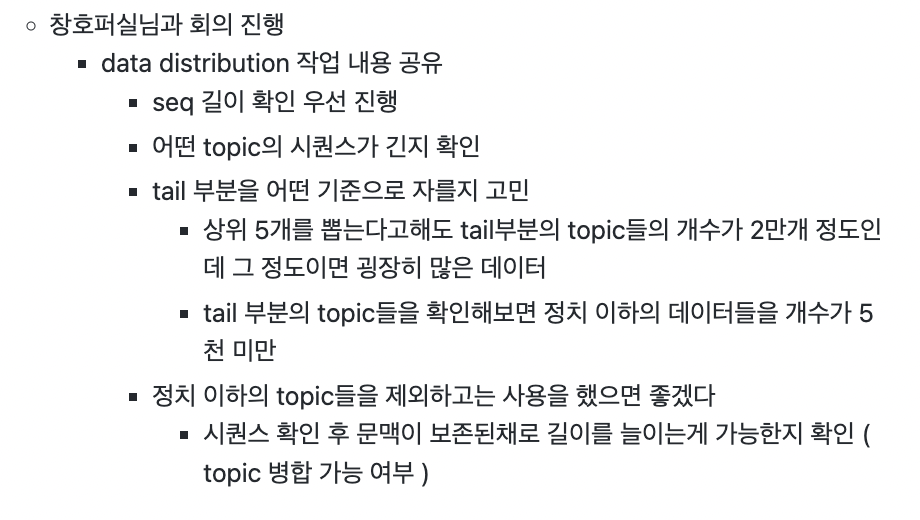

In [121]:
import os 
import numpy as np 
import pandas as pd

from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline


In [2]:
directory = os.getenv('HOME') + '/aiffel/aiffelthon/'

In [3]:
df = pd.read_csv(directory + 'meta_eng_raw_0306_v1.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [88]:
df_copy = df.copy()

In [5]:
df.head()

text  \
0                          생각이 쪼금씩 바뀌더라고   
1                어 알겠는가 외국인들이 그래도 잘 적응하고   
2               아으 갑자기 예전에 맹장 뜯은 게 생각난다.   
3  보면은 조금 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.   
4           약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도   

                                   dial  \
0                         생각이 쪼금씩 바뀌드라고   
1               어 알겄는가 외국인들이 그래도 잘 적응하고   
2             아으 갑자기 예전에 맹장 뜯은 게 생각난디야.   
3  보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.   
4           약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도   

                                                 eng  \
0                 I've changed my mind a little bit.   
1    You know what? Foreigners still get used to it.   
2  All of a sudden, I think I've ripped off my ap...   
3  I have a lot of ideas about getting older in a...   
4        It's a little bit of a tastey, but still...   

                        title creator distributor    year  \
0                DJSX20003625    솔트룩스        솔트룩스  2020.0   
1                DJSX20004230    솔트룩스        솔트룩스  2020.0   
2  전라방언 AI 학습데이터 DJDG20001138    솔트룩스        솔트룩스  2020.0   
3  전라방언 AI 학습데이터 DJDG20001095    솔트룩스        솔트룩스  2020.0   
4  전라방언 AI 학습데이터 DJDG20001507    솔트룩스        솔트룩스  2020.0   

               category annotation_level sampling  ... sex prin_res curr_res  \
0  전라방언 > 사적 대화 > 일상 대화           ['원시']    본문 전체  ...  남성       광주       광주   
1    전라방언 > 사적대화 > 일상대화           ['원시']    본문 전체  ...  여성       전남       광주   
2  전라방언 > 사적 대화 > 일상 대화           ['원시']    본문 전체  ...  여성       광주       전북   
3  전라방언 > 사적 대화 > 일상 대화           ['원시']    본문 전체  ...  여성       전북       전북   
4  전라방언 > 사적 대화 > 일상 대화           ['원시']    본문 전체  ...  남성       전북       전북   

  age2 sex2 prin_res2 curr_res2                                   stdn  \
0  40대   남성        광주        전남                          생각이 쪼금씩 바뀌더라고   
1  50대   여성        광주        광주                어 알겠는가 외국인들이 그래도 잘 적응하고   
2  20대   여성        전북        전북               아으 갑자기 예전에 맹장 뜯은 게 생각난다.   
3  50대   여성        전북        경기  보면은 조금 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.   
4  20대   남성        전북        전북           약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도   

              eojeol_stdn reg  
0   [['(바뀌드라고)/(바뀌더라고)']]  jd  
1     [['(알겄는가)/(알겠는가)']]  jd  
2  [['(생각난디야.)/(생각난다.)']]  jd  
3          [['(쫌)/(조금)']]  jd  
4          [['(쫌)/(조금)']]  jd  

[5 rows x 25 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949888 entries, 0 to 949887
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   text              949888 non-null  object
 1   dial              949888 non-null  object
 2   eng               949888 non-null  object
 3   title             949888 non-null  object
 4   creator           949888 non-null  object
 5   distributor       949706 non-null  object
 6   year              949888 non-null  object
 7   category          949706 non-null  object
 8   annotation_level  949888 non-null  object
 9   sampling          949417 non-null  object
 10  author            925576 non-null  object
 11  publisher         925576 non-null  object
 12  date              949888 non-null  object
 13  topic             949888 non-null  object
 14  age               949888 non-null  object
 15  sex               949888 non-null  object
 16  prin_res          949888 non-null  obj

In [7]:
df[['text','dial','eng','topic']]

text  \
0                                           생각이 쪼금씩 바뀌더라고   
1                                 어 알겠는가 외국인들이 그래도 잘 적응하고   
2                                아으 갑자기 예전에 맹장 뜯은 게 생각난다.   
3                   보면은 조금 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.   
4                            약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도   
...                                                   ...   
949883  뭐~ 맨날 집에서 인제 음식도 그냥 가까운 데 나가서 먹는 게 아니라 되게 시켜먹는...   
949884                  너는 만약에 그런 시대가 오면 네가 어떻게 활동할 것 같애?   
949885      하이브도 있고 #조석 작가 이제 조의 영역이라는 웹툰도 있고 마음의 소리도 있는데   
949886        추석도 친척들도 사촌까지만 모이긴 했는데 이~ 다 모이니까 할 말도 많고 이~   
949887             커피숍 가서 이렇게 먹고 하는 거가 훨씬 맛있거든 기분상으로도 그렇고   

                                                     dial  \
0                                           생각이 쪼금씩 바뀌드라고   
1                                 어 알겄는가 외국인들이 그래도 잘 적응하고   
2                               아으 갑자기 예전에 맹장 뜯은 게 생각난디야.   
3                    보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.   
4                             약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도   
...                                                   ...   
949883  뭐~ 맨날 집에서 인제 음식도 그냥 가까운 데 나가서 먹는 게 아니라 되게 시켜먹는...   
949884                  너는 만약에 그런 시대가 오면 니가 어떻게 활동할 것 같애?   
949885       하이브도 있고 조석 작가 이제 조의 영역이라는 웹툰도 있고 마음의 소리도 있는디   
949886        추석도 친척들도 사촌까지만 모이긴 했는데 이~ 다 모이난이 할 말도 많고 이~   
949887              커피숍 가서 이케 먹고 하는 거가 훨씬 맛있거든 기분상으로도 그렇고   

                                                      eng   topic  
0                      I've changed my mind a little bit.      역사  
1         You know what? Foreigners still get used to it.      가족  
2       All of a sudden, I think I've ripped off my ap...      건강  
3       I have a lot of ideas about getting older in a...     스타일  
4             It's a little bit of a tastey, but still...     먹거리  
...                                                   ...     ...  
949883  I suppose I dont just go out to the nearest pl...    다이어트  
949884  How do you think you will be active when that ...  4차산업혁명  
949885  There is a hive a webtoon called the area of J...      만화  
949886  On Chuseok relatives and cousins only gathered...    반려동물  
949887  Its much better to eat at a coffee shop and it...     먹거리  

[949888 rows x 4 columns]

### column별 seq 평균 길이 

In [25]:
text_len_avg = int(df["text"].str.len().mean())
text_len_avg

26

In [26]:
dial_len_avg= int(df["dial"].str.len().mean())
dial_len_avg

26

In [27]:
eng_len_avg = int(df["eng"].str.len().mean())
eng_len_avg

56

### 길이별로 데이터 개수 확인

In [61]:
df.text.apply(lambda x: len(str(x)) < 25).sum()

490034

In [60]:
df.text.apply(lambda x: len(str(x)) < 50).sum()

885383

In [64]:
df.text.apply(lambda x: 50 <= len(str(x)) < 75).sum()

60916

In [65]:
df.text.apply(lambda x: 75 <= len(str(x)) < 100).sum()

3356

In [59]:
df.text.apply(lambda x: 100 <= len(str(x))).sum()

233

In [66]:
df.topic.value_counts()

가족            156058
연애/결혼          83728
먹거리            65261
회사/학교          64880
여행지(국내/해외)     45034
건강             41746
드라마            41174
성격             28034
취미             27904
영화             22700
방송/연예          22438
꿈(목표)          21704
아르바이트          21414
반려동물           19789
계절             18619
쇼핑             18558
음악             17865
다이어트           15617
스타일            14218
스포츠/레저         13856
경제             13291
공연             12397
선물             12248
문학             11883
날씨             11881
군대             11792
좌우명            11636
재테크            11561
게임             10945
역사             10869
종교             10727
전자기기           10540
자동차/오토바이       10045
자격증             8476
콤플렉스            8277
만화              7044
SNS             6160
정치              3743
4차산업혁명          3211
법률              2565
Name: topic, dtype: int64

### 상위 5개 topic 분리

In [103]:
df_top_1 = df[df['topic'].str.contains('가족')]
df_top_2 = df[df['topic'].str.contains('연애/결혼')]
df_top_3 = df[df['topic'].str.contains('먹거리')]
df_top_4 = df[df['topic'].str.contains('회사/학교')]
df_top_5 = df[df['topic'].str.contains('여행지')]

In [127]:
df_top_1_ls = list(df_top_1['text'])
df_top_1_ls

['어 알겠는가 외국인들이 그래도 잘 적응하고',
 '뭐 그걸로 애초에 내가 뭐 증명을 하려고 했었는데',
 '그렇죠?',
 '머리 쪽에 엠알아이를 찍어 보래요.',
 '한번 그냥 속는 셈 치고 가보세 그러더라고.',
 '그래서 인제 큰일 났다',
 '응~ 하라는 공부는 안 하고 맨날 술 처먹고 돌아다니다가 응~ 자기는 자기 나름대로 공부를 한다고 하는데 내가 뭐~ 우기는 그게 아닌 거 같거든.',
 '그리고 막둥이는',
 '터지기 직전의 것도 이제 이거 이렇게 뭘 빼 갖고 이제',
 '같이 가서 나는 일층 로비에 기다리고',
 '나는 애낳고 몸 풀러 몸 만드려고 약 지으러 갔는데',
 '가족들이 더 많이 생기고 그러면은',
 '그래서 그냥 이제 그 상태에서는 우리가 선택을 하면 산소호흡기를 꽂아서 놓을 수 있는데',
 '그~ 흔히 막 중이병이라고 하지 그래 가지구 막 자기가 뭐~ 완전 센 거 같고 막 자기가 막 최고인 거 같고 막 그래 가지고',
 '그러니까 요거를 계속 한 거지 요거 요거 요거 CPR 라 근가',
 '하나는 핏줄이 머리를 향한 핏줄이 좁아졌고',
 '거기서 찍어보라니까 인제 난 무섭지',
 '그리고 우리 오빠는 지금 공부를 하는 중인데 이 시키가',
 '별로 부를 기회도 없고 애들이',
 '그날 염색을 하고 아이구 어머니한테 이쁘게 가야되겠다 이런 생각이 들었다고?',
 '솔직히 과락 뜬 과목 열심히 했으면 그 정도는 붙어야 되는 거 아니냐고 근데 또 자기는 또',
 '보면서 하고 있으면 그 다음날 아침에 일어나는 게 너무 편한데',
 '메니에르 혹시 메니에르라고 알아?',
 '근데 나는 한 없이 남겨 갖고 엄마를 이렇게 챙겨주 챙겨 줬대.',
 '여자 친구를 사귈 수 있지 않을까라고 생각핸 하는데',
 '그래서 이제 입원해 가지고 엠알아이 찍고 나왔는데 아무 이상이 없데요.',
 '우리 애들도 결혼하면 이제',
 '주머니에 넣어 주거나 손에 이렇게 갖다주거든',
 '식구들이 이제 아버님 볼 때까지만 어떻게 오실 때까지만 이렇게',
 '원만

In [128]:
df_top_2_ls = list(df_top_2['text'])
df_top_3_ls = list(df_top_3['text'])
df_top_4_ls = list(df_top_4['text'])
df_top_5_ls = list(df_top_5['text'])

### topic별 최대 / 최소 길이

In [242]:
# 가족 
df_top_1_len = [len(t) for t in df_top_1_ls]
df_top_1_len.sort()
print(df_top_1_len[0])
print(df_top_1_len[-1:])

1
[119]


In [243]:
# 연애/결혼
df_top_2_len = [len(t) for t in df_top_2_ls]
df_top_2_len.sort()
print(df_top_2_len[0])
print(df_top_2_len[-1:])

1
[145]


In [245]:
# 먹거리
df_top_3_len = [len(t) for t in df_top_3_ls]
df_top_3_len.sort()
print(df_top_3_len[0])
print(df_top_3_len[-1:])

2
[120]


In [246]:
# 회사/학교 
df_top_4_len = [len(t) for t in df_top_4_ls]
df_top_4_len.sort()
print(df_top_4_len[0])
print(df_top_4_len[-1:])

1
[124]


In [247]:
# 여행지
df_top_5_len = [len(t) for t in df_top_5_ls]
df_top_5_len.sort()
print(df_top_5_len[0])
print(df_top_5_len[-1:])

1
[112]


#### 중복값 개수 구하기

In [255]:
from collections import Counter

In [267]:
df_top_1_counter = Counter(df_top_1_len)

print(dict(df_top_1_counter))

{1: 3, 2: 112, 3: 427, 4: 855, 5: 1489, 6: 2283, 7: 3282, 8: 4037, 9: 4649, 10: 5207, 11: 5492, 12: 5706, 13: 6216, 14: 6169, 15: 6259, 16: 6140, 17: 5927, 18: 5959, 19: 5745, 20: 5485, 21: 5386, 22: 5038, 23: 4849, 24: 4600, 25: 4210, 26: 4142, 27: 3866, 28: 3566, 29: 3372, 30: 3095, 31: 2916, 32: 2716, 33: 2476, 34: 2349, 35: 2117, 36: 1933, 37: 1765, 38: 1575, 39: 1521, 40: 1330, 41: 1168, 42: 1087, 43: 978, 44: 926, 45: 802, 46: 758, 47: 645, 48: 586, 49: 519, 50: 454, 51: 412, 52: 348, 53: 364, 54: 323, 55: 272, 56: 254, 57: 207, 58: 203, 59: 163, 60: 147, 61: 144, 62: 113, 63: 96, 64: 100, 65: 75, 66: 65, 67: 63, 68: 58, 69: 50, 70: 48, 71: 24, 72: 36, 73: 33, 74: 33, 75: 14, 76: 26, 77: 15, 78: 18, 79: 18, 80: 16, 81: 17, 82: 12, 83: 12, 84: 8, 85: 9, 86: 9, 87: 8, 88: 6, 89: 5, 90: 6, 91: 2, 92: 4, 93: 4, 94: 4, 95: 2, 96: 2, 98: 2, 99: 3, 100: 1, 101: 3, 103: 3, 104: 2, 105: 1, 106: 1, 109: 2, 112: 1, 115: 1, 117: 1, 118: 1, 119: 1}


In [278]:
for i , v in enumerate(df_top_1_len):
    print("index : {} , length : {}".format(i,v))

index : 0 , length : 1
index : 1 , length : 1
index : 2 , length : 1
index : 3 , length : 2
index : 4 , length : 2
index : 5 , length : 2
index : 6 , length : 2
index : 7 , length : 2
index : 8 , length : 2
index : 9 , length : 2
index : 10 , length : 2
index : 11 , length : 2
index : 12 , length : 2
index : 13 , length : 2
index : 14 , length : 2
index : 15 , length : 2
index : 16 , length : 2
index : 17 , length : 2
index : 18 , length : 2
index : 19 , length : 2
index : 20 , length : 2
index : 21 , length : 2
index : 22 , length : 2
index : 23 , length : 2
index : 24 , length : 2
index : 25 , length : 2
index : 26 , length : 2
index : 27 , length : 2
index : 28 , length : 2
index : 29 , length : 2
index : 30 , length : 2
index : 31 , length : 2
index : 32 , length : 2
index : 33 , length : 2
index : 34 , length : 2
index : 35 , length : 2
index : 36 , length : 2
index : 37 , length : 2
index : 38 , length : 2
index : 39 , length : 2
index : 40 , length : 2
index : 41 , length : 2
in

index : 2219 , length : 5
index : 2220 , length : 5
index : 2221 , length : 5
index : 2222 , length : 5
index : 2223 , length : 5
index : 2224 , length : 5
index : 2225 , length : 5
index : 2226 , length : 5
index : 2227 , length : 5
index : 2228 , length : 5
index : 2229 , length : 5
index : 2230 , length : 5
index : 2231 , length : 5
index : 2232 , length : 5
index : 2233 , length : 5
index : 2234 , length : 5
index : 2235 , length : 5
index : 2236 , length : 5
index : 2237 , length : 5
index : 2238 , length : 5
index : 2239 , length : 5
index : 2240 , length : 5
index : 2241 , length : 5
index : 2242 , length : 5
index : 2243 , length : 5
index : 2244 , length : 5
index : 2245 , length : 5
index : 2246 , length : 5
index : 2247 , length : 5
index : 2248 , length : 5
index : 2249 , length : 5
index : 2250 , length : 5
index : 2251 , length : 5
index : 2252 , length : 5
index : 2253 , length : 5
index : 2254 , length : 5
index : 2255 , length : 5
index : 2256 , length : 5
index : 2257

index : 4419 , length : 6
index : 4420 , length : 6
index : 4421 , length : 6
index : 4422 , length : 6
index : 4423 , length : 6
index : 4424 , length : 6
index : 4425 , length : 6
index : 4426 , length : 6
index : 4427 , length : 6
index : 4428 , length : 6
index : 4429 , length : 6
index : 4430 , length : 6
index : 4431 , length : 6
index : 4432 , length : 6
index : 4433 , length : 6
index : 4434 , length : 6
index : 4435 , length : 6
index : 4436 , length : 6
index : 4437 , length : 6
index : 4438 , length : 6
index : 4439 , length : 6
index : 4440 , length : 6
index : 4441 , length : 6
index : 4442 , length : 6
index : 4443 , length : 6
index : 4444 , length : 6
index : 4445 , length : 6
index : 4446 , length : 6
index : 4447 , length : 6
index : 4448 , length : 6
index : 4449 , length : 6
index : 4450 , length : 6
index : 4451 , length : 6
index : 4452 , length : 6
index : 4453 , length : 6
index : 4454 , length : 6
index : 4455 , length : 6
index : 4456 , length : 6
index : 4457

index : 6734 , length : 7
index : 6735 , length : 7
index : 6736 , length : 7
index : 6737 , length : 7
index : 6738 , length : 7
index : 6739 , length : 7
index : 6740 , length : 7
index : 6741 , length : 7
index : 6742 , length : 7
index : 6743 , length : 7
index : 6744 , length : 7
index : 6745 , length : 7
index : 6746 , length : 7
index : 6747 , length : 7
index : 6748 , length : 7
index : 6749 , length : 7
index : 6750 , length : 7
index : 6751 , length : 7
index : 6752 , length : 7
index : 6753 , length : 7
index : 6754 , length : 7
index : 6755 , length : 7
index : 6756 , length : 7
index : 6757 , length : 7
index : 6758 , length : 7
index : 6759 , length : 7
index : 6760 , length : 7
index : 6761 , length : 7
index : 6762 , length : 7
index : 6763 , length : 7
index : 6764 , length : 7
index : 6765 , length : 7
index : 6766 , length : 7
index : 6767 , length : 7
index : 6768 , length : 7
index : 6769 , length : 7
index : 6770 , length : 7
index : 6771 , length : 7
index : 6772

index : 9161 , length : 8
index : 9162 , length : 8
index : 9163 , length : 8
index : 9164 , length : 8
index : 9165 , length : 8
index : 9166 , length : 8
index : 9167 , length : 8
index : 9168 , length : 8
index : 9169 , length : 8
index : 9170 , length : 8
index : 9171 , length : 8
index : 9172 , length : 8
index : 9173 , length : 8
index : 9174 , length : 8
index : 9175 , length : 8
index : 9176 , length : 8
index : 9177 , length : 8
index : 9178 , length : 8
index : 9179 , length : 8
index : 9180 , length : 8
index : 9181 , length : 8
index : 9182 , length : 8
index : 9183 , length : 8
index : 9184 , length : 8
index : 9185 , length : 8
index : 9186 , length : 8
index : 9187 , length : 8
index : 9188 , length : 8
index : 9189 , length : 8
index : 9190 , length : 8
index : 9191 , length : 8
index : 9192 , length : 8
index : 9193 , length : 8
index : 9194 , length : 8
index : 9195 , length : 8
index : 9196 , length : 8
index : 9197 , length : 8
index : 9198 , length : 8
index : 9199

index : 11218 , length : 8
index : 11219 , length : 8
index : 11220 , length : 8
index : 11221 , length : 8
index : 11222 , length : 8
index : 11223 , length : 8
index : 11224 , length : 8
index : 11225 , length : 8
index : 11226 , length : 8
index : 11227 , length : 8
index : 11228 , length : 8
index : 11229 , length : 8
index : 11230 , length : 8
index : 11231 , length : 8
index : 11232 , length : 8
index : 11233 , length : 8
index : 11234 , length : 8
index : 11235 , length : 8
index : 11236 , length : 8
index : 11237 , length : 8
index : 11238 , length : 8
index : 11239 , length : 8
index : 11240 , length : 8
index : 11241 , length : 8
index : 11242 , length : 8
index : 11243 , length : 8
index : 11244 , length : 8
index : 11245 , length : 8
index : 11246 , length : 8
index : 11247 , length : 8
index : 11248 , length : 8
index : 11249 , length : 8
index : 11250 , length : 8
index : 11251 , length : 8
index : 11252 , length : 8
index : 11253 , length : 8
index : 11254 , length : 8
i

index : 13439 , length : 9
index : 13440 , length : 9
index : 13441 , length : 9
index : 13442 , length : 9
index : 13443 , length : 9
index : 13444 , length : 9
index : 13445 , length : 9
index : 13446 , length : 9
index : 13447 , length : 9
index : 13448 , length : 9
index : 13449 , length : 9
index : 13450 , length : 9
index : 13451 , length : 9
index : 13452 , length : 9
index : 13453 , length : 9
index : 13454 , length : 9
index : 13455 , length : 9
index : 13456 , length : 9
index : 13457 , length : 9
index : 13458 , length : 9
index : 13459 , length : 9
index : 13460 , length : 9
index : 13461 , length : 9
index : 13462 , length : 9
index : 13463 , length : 9
index : 13464 , length : 9
index : 13465 , length : 9
index : 13466 , length : 9
index : 13467 , length : 9
index : 13468 , length : 9
index : 13469 , length : 9
index : 13470 , length : 9
index : 13471 , length : 9
index : 13472 , length : 9
index : 13473 , length : 9
index : 13474 , length : 9
index : 13475 , length : 9
i

index : 15691 , length : 9
index : 15692 , length : 9
index : 15693 , length : 9
index : 15694 , length : 9
index : 15695 , length : 9
index : 15696 , length : 9
index : 15697 , length : 9
index : 15698 , length : 9
index : 15699 , length : 9
index : 15700 , length : 9
index : 15701 , length : 9
index : 15702 , length : 9
index : 15703 , length : 9
index : 15704 , length : 9
index : 15705 , length : 9
index : 15706 , length : 9
index : 15707 , length : 9
index : 15708 , length : 9
index : 15709 , length : 9
index : 15710 , length : 9
index : 15711 , length : 9
index : 15712 , length : 9
index : 15713 , length : 9
index : 15714 , length : 9
index : 15715 , length : 9
index : 15716 , length : 9
index : 15717 , length : 9
index : 15718 , length : 9
index : 15719 , length : 9
index : 15720 , length : 9
index : 15721 , length : 9
index : 15722 , length : 9
index : 15723 , length : 9
index : 15724 , length : 9
index : 15725 , length : 9
index : 15726 , length : 9
index : 15727 , length : 9
i

index : 18040 , length : 10
index : 18041 , length : 10
index : 18042 , length : 10
index : 18043 , length : 10
index : 18044 , length : 10
index : 18045 , length : 10
index : 18046 , length : 10
index : 18047 , length : 10
index : 18048 , length : 10
index : 18049 , length : 10
index : 18050 , length : 10
index : 18051 , length : 10
index : 18052 , length : 10
index : 18053 , length : 10
index : 18054 , length : 10
index : 18055 , length : 10
index : 18056 , length : 10
index : 18057 , length : 10
index : 18058 , length : 10
index : 18059 , length : 10
index : 18060 , length : 10
index : 18061 , length : 10
index : 18062 , length : 10
index : 18063 , length : 10
index : 18064 , length : 10
index : 18065 , length : 10
index : 18066 , length : 10
index : 18067 , length : 10
index : 18068 , length : 10
index : 18069 , length : 10
index : 18070 , length : 10
index : 18071 , length : 10
index : 18072 , length : 10
index : 18073 , length : 10
index : 18074 , length : 10
index : 18075 , leng

index : 20285 , length : 10
index : 20286 , length : 10
index : 20287 , length : 10
index : 20288 , length : 10
index : 20289 , length : 10
index : 20290 , length : 10
index : 20291 , length : 10
index : 20292 , length : 10
index : 20293 , length : 10
index : 20294 , length : 10
index : 20295 , length : 10
index : 20296 , length : 10
index : 20297 , length : 10
index : 20298 , length : 10
index : 20299 , length : 10
index : 20300 , length : 10
index : 20301 , length : 10
index : 20302 , length : 10
index : 20303 , length : 10
index : 20304 , length : 10
index : 20305 , length : 10
index : 20306 , length : 10
index : 20307 , length : 10
index : 20308 , length : 10
index : 20309 , length : 10
index : 20310 , length : 10
index : 20311 , length : 10
index : 20312 , length : 10
index : 20313 , length : 10
index : 20314 , length : 10
index : 20315 , length : 10
index : 20316 , length : 10
index : 20317 , length : 10
index : 20318 , length : 10
index : 20319 , length : 10
index : 20320 , leng

index : 22620 , length : 11
index : 22621 , length : 11
index : 22622 , length : 11
index : 22623 , length : 11
index : 22624 , length : 11
index : 22625 , length : 11
index : 22626 , length : 11
index : 22627 , length : 11
index : 22628 , length : 11
index : 22629 , length : 11
index : 22630 , length : 11
index : 22631 , length : 11
index : 22632 , length : 11
index : 22633 , length : 11
index : 22634 , length : 11
index : 22635 , length : 11
index : 22636 , length : 11
index : 22637 , length : 11
index : 22638 , length : 11
index : 22639 , length : 11
index : 22640 , length : 11
index : 22641 , length : 11
index : 22642 , length : 11
index : 22643 , length : 11
index : 22644 , length : 11
index : 22645 , length : 11
index : 22646 , length : 11
index : 22647 , length : 11
index : 22648 , length : 11
index : 22649 , length : 11
index : 22650 , length : 11
index : 22651 , length : 11
index : 22652 , length : 11
index : 22653 , length : 11
index : 22654 , length : 11
index : 22655 , leng

index : 24599 , length : 11
index : 24600 , length : 11
index : 24601 , length : 11
index : 24602 , length : 11
index : 24603 , length : 11
index : 24604 , length : 11
index : 24605 , length : 11
index : 24606 , length : 11
index : 24607 , length : 11
index : 24608 , length : 11
index : 24609 , length : 11
index : 24610 , length : 11
index : 24611 , length : 11
index : 24612 , length : 11
index : 24613 , length : 11
index : 24614 , length : 11
index : 24615 , length : 11
index : 24616 , length : 11
index : 24617 , length : 11
index : 24618 , length : 11
index : 24619 , length : 11
index : 24620 , length : 11
index : 24621 , length : 11
index : 24622 , length : 11
index : 24623 , length : 11
index : 24624 , length : 11
index : 24625 , length : 11
index : 24626 , length : 11
index : 24627 , length : 11
index : 24628 , length : 11
index : 24629 , length : 11
index : 24630 , length : 11
index : 24631 , length : 11
index : 24632 , length : 11
index : 24633 , length : 11
index : 24634 , leng

index : 26920 , length : 11
index : 26921 , length : 11
index : 26922 , length : 11
index : 26923 , length : 11
index : 26924 , length : 11
index : 26925 , length : 11
index : 26926 , length : 11
index : 26927 , length : 11
index : 26928 , length : 11
index : 26929 , length : 11
index : 26930 , length : 11
index : 26931 , length : 11
index : 26932 , length : 11
index : 26933 , length : 11
index : 26934 , length : 11
index : 26935 , length : 11
index : 26936 , length : 11
index : 26937 , length : 11
index : 26938 , length : 11
index : 26939 , length : 11
index : 26940 , length : 11
index : 26941 , length : 11
index : 26942 , length : 11
index : 26943 , length : 11
index : 26944 , length : 11
index : 26945 , length : 11
index : 26946 , length : 11
index : 26947 , length : 11
index : 26948 , length : 11
index : 26949 , length : 11
index : 26950 , length : 11
index : 26951 , length : 11
index : 26952 , length : 11
index : 26953 , length : 11
index : 26954 , length : 11
index : 26955 , leng

index : 28530 , length : 12
index : 28531 , length : 12
index : 28532 , length : 12
index : 28533 , length : 12
index : 28534 , length : 12
index : 28535 , length : 12
index : 28536 , length : 12
index : 28537 , length : 12
index : 28538 , length : 12
index : 28539 , length : 12
index : 28540 , length : 12
index : 28541 , length : 12
index : 28542 , length : 12
index : 28543 , length : 12
index : 28544 , length : 12
index : 28545 , length : 12
index : 28546 , length : 12
index : 28547 , length : 12
index : 28548 , length : 12
index : 28549 , length : 12
index : 28550 , length : 12
index : 28551 , length : 12
index : 28552 , length : 12
index : 28553 , length : 12
index : 28554 , length : 12
index : 28555 , length : 12
index : 28556 , length : 12
index : 28557 , length : 12
index : 28558 , length : 12
index : 28559 , length : 12
index : 28560 , length : 12
index : 28561 , length : 12
index : 28562 , length : 12
index : 28563 , length : 12
index : 28564 , length : 12
index : 28565 , leng

index : 30659 , length : 12
index : 30660 , length : 12
index : 30661 , length : 12
index : 30662 , length : 12
index : 30663 , length : 12
index : 30664 , length : 12
index : 30665 , length : 12
index : 30666 , length : 12
index : 30667 , length : 12
index : 30668 , length : 12
index : 30669 , length : 12
index : 30670 , length : 12
index : 30671 , length : 12
index : 30672 , length : 12
index : 30673 , length : 12
index : 30674 , length : 12
index : 30675 , length : 12
index : 30676 , length : 12
index : 30677 , length : 12
index : 30678 , length : 12
index : 30679 , length : 12
index : 30680 , length : 12
index : 30681 , length : 12
index : 30682 , length : 12
index : 30683 , length : 12
index : 30684 , length : 12
index : 30685 , length : 12
index : 30686 , length : 12
index : 30687 , length : 12
index : 30688 , length : 12
index : 30689 , length : 12
index : 30690 , length : 12
index : 30691 , length : 12
index : 30692 , length : 12
index : 30693 , length : 12
index : 30694 , leng

index : 32834 , length : 12
index : 32835 , length : 12
index : 32836 , length : 12
index : 32837 , length : 12
index : 32838 , length : 12
index : 32839 , length : 12
index : 32840 , length : 12
index : 32841 , length : 12
index : 32842 , length : 12
index : 32843 , length : 12
index : 32844 , length : 12
index : 32845 , length : 12
index : 32846 , length : 12
index : 32847 , length : 12
index : 32848 , length : 12
index : 32849 , length : 12
index : 32850 , length : 12
index : 32851 , length : 12
index : 32852 , length : 12
index : 32853 , length : 12
index : 32854 , length : 12
index : 32855 , length : 12
index : 32856 , length : 12
index : 32857 , length : 12
index : 32858 , length : 12
index : 32859 , length : 12
index : 32860 , length : 12
index : 32861 , length : 12
index : 32862 , length : 12
index : 32863 , length : 12
index : 32864 , length : 12
index : 32865 , length : 12
index : 32866 , length : 12
index : 32867 , length : 12
index : 32868 , length : 12
index : 32869 , leng

index : 34665 , length : 13
index : 34666 , length : 13
index : 34667 , length : 13
index : 34668 , length : 13
index : 34669 , length : 13
index : 34670 , length : 13
index : 34671 , length : 13
index : 34672 , length : 13
index : 34673 , length : 13
index : 34674 , length : 13
index : 34675 , length : 13
index : 34676 , length : 13
index : 34677 , length : 13
index : 34678 , length : 13
index : 34679 , length : 13
index : 34680 , length : 13
index : 34681 , length : 13
index : 34682 , length : 13
index : 34683 , length : 13
index : 34684 , length : 13
index : 34685 , length : 13
index : 34686 , length : 13
index : 34687 , length : 13
index : 34688 , length : 13
index : 34689 , length : 13
index : 34690 , length : 13
index : 34691 , length : 13
index : 34692 , length : 13
index : 34693 , length : 13
index : 34694 , length : 13
index : 34695 , length : 13
index : 34696 , length : 13
index : 34697 , length : 13
index : 34698 , length : 13
index : 34699 , length : 13
index : 34700 , leng

index : 36846 , length : 13
index : 36847 , length : 13
index : 36848 , length : 13
index : 36849 , length : 13
index : 36850 , length : 13
index : 36851 , length : 13
index : 36852 , length : 13
index : 36853 , length : 13
index : 36854 , length : 13
index : 36855 , length : 13
index : 36856 , length : 13
index : 36857 , length : 13
index : 36858 , length : 13
index : 36859 , length : 13
index : 36860 , length : 13
index : 36861 , length : 13
index : 36862 , length : 13
index : 36863 , length : 13
index : 36864 , length : 13
index : 36865 , length : 13
index : 36866 , length : 13
index : 36867 , length : 13
index : 36868 , length : 13
index : 36869 , length : 13
index : 36870 , length : 13
index : 36871 , length : 13
index : 36872 , length : 13
index : 36873 , length : 13
index : 36874 , length : 13
index : 36875 , length : 13
index : 36876 , length : 13
index : 36877 , length : 13
index : 36878 , length : 13
index : 36879 , length : 13
index : 36880 , length : 13
index : 36881 , leng

index : 39111 , length : 13
index : 39112 , length : 13
index : 39113 , length : 13
index : 39114 , length : 13
index : 39115 , length : 13
index : 39116 , length : 13
index : 39117 , length : 13
index : 39118 , length : 13
index : 39119 , length : 13
index : 39120 , length : 13
index : 39121 , length : 13
index : 39122 , length : 13
index : 39123 , length : 13
index : 39124 , length : 13
index : 39125 , length : 13
index : 39126 , length : 13
index : 39127 , length : 13
index : 39128 , length : 13
index : 39129 , length : 13
index : 39130 , length : 13
index : 39131 , length : 13
index : 39132 , length : 13
index : 39133 , length : 13
index : 39134 , length : 13
index : 39135 , length : 13
index : 39136 , length : 13
index : 39137 , length : 13
index : 39138 , length : 13
index : 39139 , length : 13
index : 39140 , length : 13
index : 39141 , length : 13
index : 39142 , length : 13
index : 39143 , length : 13
index : 39144 , length : 13
index : 39145 , length : 13
index : 39146 , leng

index : 40893 , length : 14
index : 40894 , length : 14
index : 40895 , length : 14
index : 40896 , length : 14
index : 40897 , length : 14
index : 40898 , length : 14
index : 40899 , length : 14
index : 40900 , length : 14
index : 40901 , length : 14
index : 40902 , length : 14
index : 40903 , length : 14
index : 40904 , length : 14
index : 40905 , length : 14
index : 40906 , length : 14
index : 40907 , length : 14
index : 40908 , length : 14
index : 40909 , length : 14
index : 40910 , length : 14
index : 40911 , length : 14
index : 40912 , length : 14
index : 40913 , length : 14
index : 40914 , length : 14
index : 40915 , length : 14
index : 40916 , length : 14
index : 40917 , length : 14
index : 40918 , length : 14
index : 40919 , length : 14
index : 40920 , length : 14
index : 40921 , length : 14
index : 40922 , length : 14
index : 40923 , length : 14
index : 40924 , length : 14
index : 40925 , length : 14
index : 40926 , length : 14
index : 40927 , length : 14
index : 40928 , leng

index : 42951 , length : 14
index : 42952 , length : 14
index : 42953 , length : 14
index : 42954 , length : 14
index : 42955 , length : 14
index : 42956 , length : 14
index : 42957 , length : 14
index : 42958 , length : 14
index : 42959 , length : 14
index : 42960 , length : 14
index : 42961 , length : 14
index : 42962 , length : 14
index : 42963 , length : 14
index : 42964 , length : 14
index : 42965 , length : 14
index : 42966 , length : 14
index : 42967 , length : 14
index : 42968 , length : 14
index : 42969 , length : 14
index : 42970 , length : 14
index : 42971 , length : 14
index : 42972 , length : 14
index : 42973 , length : 14
index : 42974 , length : 14
index : 42975 , length : 14
index : 42976 , length : 14
index : 42977 , length : 14
index : 42978 , length : 14
index : 42979 , length : 14
index : 42980 , length : 14
index : 42981 , length : 14
index : 42982 , length : 14
index : 42983 , length : 14
index : 42984 , length : 14
index : 42985 , length : 14
index : 42986 , leng

index : 44901 , length : 14
index : 44902 , length : 14
index : 44903 , length : 14
index : 44904 , length : 14
index : 44905 , length : 14
index : 44906 , length : 14
index : 44907 , length : 14
index : 44908 , length : 14
index : 44909 , length : 14
index : 44910 , length : 14
index : 44911 , length : 14
index : 44912 , length : 14
index : 44913 , length : 14
index : 44914 , length : 14
index : 44915 , length : 14
index : 44916 , length : 14
index : 44917 , length : 14
index : 44918 , length : 14
index : 44919 , length : 14
index : 44920 , length : 14
index : 44921 , length : 14
index : 44922 , length : 14
index : 44923 , length : 14
index : 44924 , length : 14
index : 44925 , length : 14
index : 44926 , length : 14
index : 44927 , length : 14
index : 44928 , length : 14
index : 44929 , length : 14
index : 44930 , length : 14
index : 44931 , length : 14
index : 44932 , length : 14
index : 44933 , length : 14
index : 44934 , length : 14
index : 44935 , length : 14
index : 44936 , leng

index : 47006 , length : 15
index : 47007 , length : 15
index : 47008 , length : 15
index : 47009 , length : 15
index : 47010 , length : 15
index : 47011 , length : 15
index : 47012 , length : 15
index : 47013 , length : 15
index : 47014 , length : 15
index : 47015 , length : 15
index : 47016 , length : 15
index : 47017 , length : 15
index : 47018 , length : 15
index : 47019 , length : 15
index : 47020 , length : 15
index : 47021 , length : 15
index : 47022 , length : 15
index : 47023 , length : 15
index : 47024 , length : 15
index : 47025 , length : 15
index : 47026 , length : 15
index : 47027 , length : 15
index : 47028 , length : 15
index : 47029 , length : 15
index : 47030 , length : 15
index : 47031 , length : 15
index : 47032 , length : 15
index : 47033 , length : 15
index : 47034 , length : 15
index : 47035 , length : 15
index : 47036 , length : 15
index : 47037 , length : 15
index : 47038 , length : 15
index : 47039 , length : 15
index : 47040 , length : 15
index : 47041 , leng

index : 48994 , length : 15
index : 48995 , length : 15
index : 48996 , length : 15
index : 48997 , length : 15
index : 48998 , length : 15
index : 48999 , length : 15
index : 49000 , length : 15
index : 49001 , length : 15
index : 49002 , length : 15
index : 49003 , length : 15
index : 49004 , length : 15
index : 49005 , length : 15
index : 49006 , length : 15
index : 49007 , length : 15
index : 49008 , length : 15
index : 49009 , length : 15
index : 49010 , length : 15
index : 49011 , length : 15
index : 49012 , length : 15
index : 49013 , length : 15
index : 49014 , length : 15
index : 49015 , length : 15
index : 49016 , length : 15
index : 49017 , length : 15
index : 49018 , length : 15
index : 49019 , length : 15
index : 49020 , length : 15
index : 49021 , length : 15
index : 49022 , length : 15
index : 49023 , length : 15
index : 49024 , length : 15
index : 49025 , length : 15
index : 49026 , length : 15
index : 49027 , length : 15
index : 49028 , length : 15
index : 49029 , leng

index : 51247 , length : 15
index : 51248 , length : 15
index : 51249 , length : 15
index : 51250 , length : 15
index : 51251 , length : 15
index : 51252 , length : 15
index : 51253 , length : 15
index : 51254 , length : 15
index : 51255 , length : 15
index : 51256 , length : 15
index : 51257 , length : 15
index : 51258 , length : 15
index : 51259 , length : 15
index : 51260 , length : 15
index : 51261 , length : 15
index : 51262 , length : 15
index : 51263 , length : 15
index : 51264 , length : 15
index : 51265 , length : 15
index : 51266 , length : 15
index : 51267 , length : 15
index : 51268 , length : 15
index : 51269 , length : 15
index : 51270 , length : 15
index : 51271 , length : 15
index : 51272 , length : 15
index : 51273 , length : 15
index : 51274 , length : 15
index : 51275 , length : 15
index : 51276 , length : 15
index : 51277 , length : 15
index : 51278 , length : 15
index : 51279 , length : 15
index : 51280 , length : 15
index : 51281 , length : 15
index : 51282 , leng

index : 53087 , length : 16
index : 53088 , length : 16
index : 53089 , length : 16
index : 53090 , length : 16
index : 53091 , length : 16
index : 53092 , length : 16
index : 53093 , length : 16
index : 53094 , length : 16
index : 53095 , length : 16
index : 53096 , length : 16
index : 53097 , length : 16
index : 53098 , length : 16
index : 53099 , length : 16
index : 53100 , length : 16
index : 53101 , length : 16
index : 53102 , length : 16
index : 53103 , length : 16
index : 53104 , length : 16
index : 53105 , length : 16
index : 53106 , length : 16
index : 53107 , length : 16
index : 53108 , length : 16
index : 53109 , length : 16
index : 53110 , length : 16
index : 53111 , length : 16
index : 53112 , length : 16
index : 53113 , length : 16
index : 53114 , length : 16
index : 53115 , length : 16
index : 53116 , length : 16
index : 53117 , length : 16
index : 53118 , length : 16
index : 53119 , length : 16
index : 53120 , length : 16
index : 53121 , length : 16
index : 53122 , leng

index : 55072 , length : 16
index : 55073 , length : 16
index : 55074 , length : 16
index : 55075 , length : 16
index : 55076 , length : 16
index : 55077 , length : 16
index : 55078 , length : 16
index : 55079 , length : 16
index : 55080 , length : 16
index : 55081 , length : 16
index : 55082 , length : 16
index : 55083 , length : 16
index : 55084 , length : 16
index : 55085 , length : 16
index : 55086 , length : 16
index : 55087 , length : 16
index : 55088 , length : 16
index : 55089 , length : 16
index : 55090 , length : 16
index : 55091 , length : 16
index : 55092 , length : 16
index : 55093 , length : 16
index : 55094 , length : 16
index : 55095 , length : 16
index : 55096 , length : 16
index : 55097 , length : 16
index : 55098 , length : 16
index : 55099 , length : 16
index : 55100 , length : 16
index : 55101 , length : 16
index : 55102 , length : 16
index : 55103 , length : 16
index : 55104 , length : 16
index : 55105 , length : 16
index : 55106 , length : 16
index : 55107 , leng

index : 57131 , length : 16
index : 57132 , length : 16
index : 57133 , length : 16
index : 57134 , length : 16
index : 57135 , length : 16
index : 57136 , length : 16
index : 57137 , length : 16
index : 57138 , length : 16
index : 57139 , length : 16
index : 57140 , length : 16
index : 57141 , length : 16
index : 57142 , length : 16
index : 57143 , length : 16
index : 57144 , length : 16
index : 57145 , length : 16
index : 57146 , length : 16
index : 57147 , length : 16
index : 57148 , length : 16
index : 57149 , length : 16
index : 57150 , length : 16
index : 57151 , length : 16
index : 57152 , length : 16
index : 57153 , length : 16
index : 57154 , length : 16
index : 57155 , length : 16
index : 57156 , length : 16
index : 57157 , length : 16
index : 57158 , length : 16
index : 57159 , length : 16
index : 57160 , length : 16
index : 57161 , length : 16
index : 57162 , length : 16
index : 57163 , length : 16
index : 57164 , length : 16
index : 57165 , length : 16
index : 57166 , leng

index : 59230 , length : 17
index : 59231 , length : 17
index : 59232 , length : 17
index : 59233 , length : 17
index : 59234 , length : 17
index : 59235 , length : 17
index : 59236 , length : 17
index : 59237 , length : 17
index : 59238 , length : 17
index : 59239 , length : 17
index : 59240 , length : 17
index : 59241 , length : 17
index : 59242 , length : 17
index : 59243 , length : 17
index : 59244 , length : 17
index : 59245 , length : 17
index : 59246 , length : 17
index : 59247 , length : 17
index : 59248 , length : 17
index : 59249 , length : 17
index : 59250 , length : 17
index : 59251 , length : 17
index : 59252 , length : 17
index : 59253 , length : 17
index : 59254 , length : 17
index : 59255 , length : 17
index : 59256 , length : 17
index : 59257 , length : 17
index : 59258 , length : 17
index : 59259 , length : 17
index : 59260 , length : 17
index : 59261 , length : 17
index : 59262 , length : 17
index : 59263 , length : 17
index : 59264 , length : 17
index : 59265 , leng

index : 61503 , length : 17
index : 61504 , length : 17
index : 61505 , length : 17
index : 61506 , length : 17
index : 61507 , length : 17
index : 61508 , length : 17
index : 61509 , length : 17
index : 61510 , length : 17
index : 61511 , length : 17
index : 61512 , length : 17
index : 61513 , length : 17
index : 61514 , length : 17
index : 61515 , length : 17
index : 61516 , length : 17
index : 61517 , length : 17
index : 61518 , length : 17
index : 61519 , length : 17
index : 61520 , length : 17
index : 61521 , length : 17
index : 61522 , length : 17
index : 61523 , length : 17
index : 61524 , length : 17
index : 61525 , length : 17
index : 61526 , length : 17
index : 61527 , length : 17
index : 61528 , length : 17
index : 61529 , length : 17
index : 61530 , length : 17
index : 61531 , length : 17
index : 61532 , length : 17
index : 61533 , length : 17
index : 61534 , length : 17
index : 61535 , length : 17
index : 61536 , length : 17
index : 61537 , length : 17
index : 61538 , leng

index : 63454 , length : 17
index : 63455 , length : 17
index : 63456 , length : 17
index : 63457 , length : 17
index : 63458 , length : 17
index : 63459 , length : 17
index : 63460 , length : 17
index : 63461 , length : 17
index : 63462 , length : 17
index : 63463 , length : 17
index : 63464 , length : 17
index : 63465 , length : 17
index : 63466 , length : 17
index : 63467 , length : 17
index : 63468 , length : 17
index : 63469 , length : 17
index : 63470 , length : 17
index : 63471 , length : 17
index : 63472 , length : 17
index : 63473 , length : 17
index : 63474 , length : 17
index : 63475 , length : 17
index : 63476 , length : 17
index : 63477 , length : 17
index : 63478 , length : 17
index : 63479 , length : 17
index : 63480 , length : 17
index : 63481 , length : 17
index : 63482 , length : 17
index : 63483 , length : 17
index : 63484 , length : 17
index : 63485 , length : 17
index : 63486 , length : 17
index : 63487 , length : 17
index : 63488 , length : 17
index : 63489 , leng

index : 65370 , length : 18
index : 65371 , length : 18
index : 65372 , length : 18
index : 65373 , length : 18
index : 65374 , length : 18
index : 65375 , length : 18
index : 65376 , length : 18
index : 65377 , length : 18
index : 65378 , length : 18
index : 65379 , length : 18
index : 65380 , length : 18
index : 65381 , length : 18
index : 65382 , length : 18
index : 65383 , length : 18
index : 65384 , length : 18
index : 65385 , length : 18
index : 65386 , length : 18
index : 65387 , length : 18
index : 65388 , length : 18
index : 65389 , length : 18
index : 65390 , length : 18
index : 65391 , length : 18
index : 65392 , length : 18
index : 65393 , length : 18
index : 65394 , length : 18
index : 65395 , length : 18
index : 65396 , length : 18
index : 65397 , length : 18
index : 65398 , length : 18
index : 65399 , length : 18
index : 65400 , length : 18
index : 65401 , length : 18
index : 65402 , length : 18
index : 65403 , length : 18
index : 65404 , length : 18
index : 65405 , leng

index : 67744 , length : 18
index : 67745 , length : 18
index : 67746 , length : 18
index : 67747 , length : 18
index : 67748 , length : 18
index : 67749 , length : 18
index : 67750 , length : 18
index : 67751 , length : 18
index : 67752 , length : 18
index : 67753 , length : 18
index : 67754 , length : 18
index : 67755 , length : 18
index : 67756 , length : 18
index : 67757 , length : 18
index : 67758 , length : 18
index : 67759 , length : 18
index : 67760 , length : 18
index : 67761 , length : 18
index : 67762 , length : 18
index : 67763 , length : 18
index : 67764 , length : 18
index : 67765 , length : 18
index : 67766 , length : 18
index : 67767 , length : 18
index : 67768 , length : 18
index : 67769 , length : 18
index : 67770 , length : 18
index : 67771 , length : 18
index : 67772 , length : 18
index : 67773 , length : 18
index : 67774 , length : 18
index : 67775 , length : 18
index : 67776 , length : 18
index : 67777 , length : 18
index : 67778 , length : 18
index : 67779 , leng

index : 69808 , length : 18
index : 69809 , length : 18
index : 69810 , length : 18
index : 69811 , length : 18
index : 69812 , length : 18
index : 69813 , length : 18
index : 69814 , length : 18
index : 69815 , length : 18
index : 69816 , length : 18
index : 69817 , length : 18
index : 69818 , length : 18
index : 69819 , length : 18
index : 69820 , length : 18
index : 69821 , length : 18
index : 69822 , length : 18
index : 69823 , length : 18
index : 69824 , length : 18
index : 69825 , length : 18
index : 69826 , length : 18
index : 69827 , length : 18
index : 69828 , length : 18
index : 69829 , length : 18
index : 69830 , length : 18
index : 69831 , length : 18
index : 69832 , length : 18
index : 69833 , length : 18
index : 69834 , length : 18
index : 69835 , length : 18
index : 69836 , length : 18
index : 69837 , length : 18
index : 69838 , length : 18
index : 69839 , length : 18
index : 69840 , length : 18
index : 69841 , length : 18
index : 69842 , length : 18
index : 69843 , leng

index : 71994 , length : 19
index : 71995 , length : 19
index : 71996 , length : 19
index : 71997 , length : 19
index : 71998 , length : 19
index : 71999 , length : 19
index : 72000 , length : 19
index : 72001 , length : 19
index : 72002 , length : 19
index : 72003 , length : 19
index : 72004 , length : 19
index : 72005 , length : 19
index : 72006 , length : 19
index : 72007 , length : 19
index : 72008 , length : 19
index : 72009 , length : 19
index : 72010 , length : 19
index : 72011 , length : 19
index : 72012 , length : 19
index : 72013 , length : 19
index : 72014 , length : 19
index : 72015 , length : 19
index : 72016 , length : 19
index : 72017 , length : 19
index : 72018 , length : 19
index : 72019 , length : 19
index : 72020 , length : 19
index : 72021 , length : 19
index : 72022 , length : 19
index : 72023 , length : 19
index : 72024 , length : 19
index : 72025 , length : 19
index : 72026 , length : 19
index : 72027 , length : 19
index : 72028 , length : 19
index : 72029 , leng

index : 73693 , length : 19
index : 73694 , length : 19
index : 73695 , length : 19
index : 73696 , length : 19
index : 73697 , length : 19
index : 73698 , length : 19
index : 73699 , length : 19
index : 73700 , length : 19
index : 73701 , length : 19
index : 73702 , length : 19
index : 73703 , length : 19
index : 73704 , length : 19
index : 73705 , length : 19
index : 73706 , length : 19
index : 73707 , length : 19
index : 73708 , length : 19
index : 73709 , length : 19
index : 73710 , length : 19
index : 73711 , length : 19
index : 73712 , length : 19
index : 73713 , length : 19
index : 73714 , length : 19
index : 73715 , length : 19
index : 73716 , length : 19
index : 73717 , length : 19
index : 73718 , length : 19
index : 73719 , length : 19
index : 73720 , length : 19
index : 73721 , length : 19
index : 73722 , length : 19
index : 73723 , length : 19
index : 73724 , length : 19
index : 73725 , length : 19
index : 73726 , length : 19
index : 73727 , length : 19
index : 73728 , leng

index : 75729 , length : 19
index : 75730 , length : 19
index : 75731 , length : 19
index : 75732 , length : 19
index : 75733 , length : 19
index : 75734 , length : 19
index : 75735 , length : 19
index : 75736 , length : 19
index : 75737 , length : 19
index : 75738 , length : 19
index : 75739 , length : 19
index : 75740 , length : 19
index : 75741 , length : 19
index : 75742 , length : 19
index : 75743 , length : 19
index : 75744 , length : 19
index : 75745 , length : 19
index : 75746 , length : 19
index : 75747 , length : 19
index : 75748 , length : 19
index : 75749 , length : 19
index : 75750 , length : 19
index : 75751 , length : 19
index : 75752 , length : 19
index : 75753 , length : 19
index : 75754 , length : 19
index : 75755 , length : 19
index : 75756 , length : 19
index : 75757 , length : 19
index : 75758 , length : 19
index : 75759 , length : 19
index : 75760 , length : 19
index : 75761 , length : 19
index : 75762 , length : 19
index : 75763 , length : 19
index : 75764 , leng

index : 78003 , length : 20
index : 78004 , length : 20
index : 78005 , length : 20
index : 78006 , length : 20
index : 78007 , length : 20
index : 78008 , length : 20
index : 78009 , length : 20
index : 78010 , length : 20
index : 78011 , length : 20
index : 78012 , length : 20
index : 78013 , length : 20
index : 78014 , length : 20
index : 78015 , length : 20
index : 78016 , length : 20
index : 78017 , length : 20
index : 78018 , length : 20
index : 78019 , length : 20
index : 78020 , length : 20
index : 78021 , length : 20
index : 78022 , length : 20
index : 78023 , length : 20
index : 78024 , length : 20
index : 78025 , length : 20
index : 78026 , length : 20
index : 78027 , length : 20
index : 78028 , length : 20
index : 78029 , length : 20
index : 78030 , length : 20
index : 78031 , length : 20
index : 78032 , length : 20
index : 78033 , length : 20
index : 78034 , length : 20
index : 78035 , length : 20
index : 78036 , length : 20
index : 78037 , length : 20
index : 78038 , leng

index : 80293 , length : 20
index : 80294 , length : 20
index : 80295 , length : 20
index : 80296 , length : 20
index : 80297 , length : 20
index : 80298 , length : 20
index : 80299 , length : 20
index : 80300 , length : 20
index : 80301 , length : 20
index : 80302 , length : 20
index : 80303 , length : 20
index : 80304 , length : 20
index : 80305 , length : 20
index : 80306 , length : 20
index : 80307 , length : 20
index : 80308 , length : 20
index : 80309 , length : 20
index : 80310 , length : 20
index : 80311 , length : 20
index : 80312 , length : 20
index : 80313 , length : 20
index : 80314 , length : 20
index : 80315 , length : 20
index : 80316 , length : 20
index : 80317 , length : 20
index : 80318 , length : 20
index : 80319 , length : 20
index : 80320 , length : 20
index : 80321 , length : 20
index : 80322 , length : 20
index : 80323 , length : 20
index : 80324 , length : 20
index : 80325 , length : 20
index : 80326 , length : 20
index : 80327 , length : 20
index : 80328 , leng

index : 82446 , length : 21
index : 82447 , length : 21
index : 82448 , length : 21
index : 82449 , length : 21
index : 82450 , length : 21
index : 82451 , length : 21
index : 82452 , length : 21
index : 82453 , length : 21
index : 82454 , length : 21
index : 82455 , length : 21
index : 82456 , length : 21
index : 82457 , length : 21
index : 82458 , length : 21
index : 82459 , length : 21
index : 82460 , length : 21
index : 82461 , length : 21
index : 82462 , length : 21
index : 82463 , length : 21
index : 82464 , length : 21
index : 82465 , length : 21
index : 82466 , length : 21
index : 82467 , length : 21
index : 82468 , length : 21
index : 82469 , length : 21
index : 82470 , length : 21
index : 82471 , length : 21
index : 82472 , length : 21
index : 82473 , length : 21
index : 82474 , length : 21
index : 82475 , length : 21
index : 82476 , length : 21
index : 82477 , length : 21
index : 82478 , length : 21
index : 82479 , length : 21
index : 82480 , length : 21
index : 82481 , leng

index : 84461 , length : 21
index : 84462 , length : 21
index : 84463 , length : 21
index : 84464 , length : 21
index : 84465 , length : 21
index : 84466 , length : 21
index : 84467 , length : 21
index : 84468 , length : 21
index : 84469 , length : 21
index : 84470 , length : 21
index : 84471 , length : 21
index : 84472 , length : 21
index : 84473 , length : 21
index : 84474 , length : 21
index : 84475 , length : 21
index : 84476 , length : 21
index : 84477 , length : 21
index : 84478 , length : 21
index : 84479 , length : 21
index : 84480 , length : 21
index : 84481 , length : 21
index : 84482 , length : 21
index : 84483 , length : 21
index : 84484 , length : 21
index : 84485 , length : 21
index : 84486 , length : 21
index : 84487 , length : 21
index : 84488 , length : 21
index : 84489 , length : 21
index : 84490 , length : 21
index : 84491 , length : 21
index : 84492 , length : 21
index : 84493 , length : 21
index : 84494 , length : 21
index : 84495 , length : 21
index : 84496 , leng

index : 86571 , length : 21
index : 86572 , length : 21
index : 86573 , length : 21
index : 86574 , length : 21
index : 86575 , length : 21
index : 86576 , length : 21
index : 86577 , length : 21
index : 86578 , length : 21
index : 86579 , length : 21
index : 86580 , length : 21
index : 86581 , length : 21
index : 86582 , length : 21
index : 86583 , length : 21
index : 86584 , length : 21
index : 86585 , length : 21
index : 86586 , length : 21
index : 86587 , length : 21
index : 86588 , length : 21
index : 86589 , length : 21
index : 86590 , length : 21
index : 86591 , length : 21
index : 86592 , length : 21
index : 86593 , length : 21
index : 86594 , length : 21
index : 86595 , length : 21
index : 86596 , length : 21
index : 86597 , length : 21
index : 86598 , length : 21
index : 86599 , length : 21
index : 86600 , length : 21
index : 86601 , length : 21
index : 86602 , length : 21
index : 86603 , length : 21
index : 86604 , length : 21
index : 86605 , length : 21
index : 86606 , leng

index : 88935 , length : 22
index : 88936 , length : 22
index : 88937 , length : 22
index : 88938 , length : 22
index : 88939 , length : 22
index : 88940 , length : 22
index : 88941 , length : 22
index : 88942 , length : 22
index : 88943 , length : 22
index : 88944 , length : 22
index : 88945 , length : 22
index : 88946 , length : 22
index : 88947 , length : 22
index : 88948 , length : 22
index : 88949 , length : 22
index : 88950 , length : 22
index : 88951 , length : 22
index : 88952 , length : 22
index : 88953 , length : 22
index : 88954 , length : 22
index : 88955 , length : 22
index : 88956 , length : 22
index : 88957 , length : 22
index : 88958 , length : 22
index : 88959 , length : 22
index : 88960 , length : 22
index : 88961 , length : 22
index : 88962 , length : 22
index : 88963 , length : 22
index : 88964 , length : 22
index : 88965 , length : 22
index : 88966 , length : 22
index : 88967 , length : 22
index : 88968 , length : 22
index : 88969 , length : 22
index : 88970 , leng

index : 91146 , length : 22
index : 91147 , length : 22
index : 91148 , length : 22
index : 91149 , length : 22
index : 91150 , length : 22
index : 91151 , length : 22
index : 91152 , length : 22
index : 91153 , length : 22
index : 91154 , length : 22
index : 91155 , length : 22
index : 91156 , length : 22
index : 91157 , length : 22
index : 91158 , length : 22
index : 91159 , length : 22
index : 91160 , length : 22
index : 91161 , length : 22
index : 91162 , length : 22
index : 91163 , length : 22
index : 91164 , length : 22
index : 91165 , length : 22
index : 91166 , length : 22
index : 91167 , length : 22
index : 91168 , length : 22
index : 91169 , length : 22
index : 91170 , length : 22
index : 91171 , length : 22
index : 91172 , length : 22
index : 91173 , length : 22
index : 91174 , length : 22
index : 91175 , length : 22
index : 91176 , length : 22
index : 91177 , length : 22
index : 91178 , length : 22
index : 91179 , length : 22
index : 91180 , length : 22
index : 91181 , leng

index : 93363 , length : 23
index : 93364 , length : 23
index : 93365 , length : 23
index : 93366 , length : 23
index : 93367 , length : 23
index : 93368 , length : 23
index : 93369 , length : 23
index : 93370 , length : 23
index : 93371 , length : 23
index : 93372 , length : 23
index : 93373 , length : 23
index : 93374 , length : 23
index : 93375 , length : 23
index : 93376 , length : 23
index : 93377 , length : 23
index : 93378 , length : 23
index : 93379 , length : 23
index : 93380 , length : 23
index : 93381 , length : 23
index : 93382 , length : 23
index : 93383 , length : 23
index : 93384 , length : 23
index : 93385 , length : 23
index : 93386 , length : 23
index : 93387 , length : 23
index : 93388 , length : 23
index : 93389 , length : 23
index : 93390 , length : 23
index : 93391 , length : 23
index : 93392 , length : 23
index : 93393 , length : 23
index : 93394 , length : 23
index : 93395 , length : 23
index : 93396 , length : 23
index : 93397 , length : 23
index : 93398 , leng

index : 95084 , length : 23
index : 95085 , length : 23
index : 95086 , length : 23
index : 95087 , length : 23
index : 95088 , length : 23
index : 95089 , length : 23
index : 95090 , length : 23
index : 95091 , length : 23
index : 95092 , length : 23
index : 95093 , length : 23
index : 95094 , length : 23
index : 95095 , length : 23
index : 95096 , length : 23
index : 95097 , length : 23
index : 95098 , length : 23
index : 95099 , length : 23
index : 95100 , length : 23
index : 95101 , length : 23
index : 95102 , length : 23
index : 95103 , length : 23
index : 95104 , length : 23
index : 95105 , length : 23
index : 95106 , length : 23
index : 95107 , length : 23
index : 95108 , length : 23
index : 95109 , length : 23
index : 95110 , length : 23
index : 95111 , length : 23
index : 95112 , length : 23
index : 95113 , length : 23
index : 95114 , length : 23
index : 95115 , length : 23
index : 95116 , length : 23
index : 95117 , length : 23
index : 95118 , length : 23
index : 95119 , leng

index : 97055 , length : 24
index : 97056 , length : 24
index : 97057 , length : 24
index : 97058 , length : 24
index : 97059 , length : 24
index : 97060 , length : 24
index : 97061 , length : 24
index : 97062 , length : 24
index : 97063 , length : 24
index : 97064 , length : 24
index : 97065 , length : 24
index : 97066 , length : 24
index : 97067 , length : 24
index : 97068 , length : 24
index : 97069 , length : 24
index : 97070 , length : 24
index : 97071 , length : 24
index : 97072 , length : 24
index : 97073 , length : 24
index : 97074 , length : 24
index : 97075 , length : 24
index : 97076 , length : 24
index : 97077 , length : 24
index : 97078 , length : 24
index : 97079 , length : 24
index : 97080 , length : 24
index : 97081 , length : 24
index : 97082 , length : 24
index : 97083 , length : 24
index : 97084 , length : 24
index : 97085 , length : 24
index : 97086 , length : 24
index : 97087 , length : 24
index : 97088 , length : 24
index : 97089 , length : 24
index : 97090 , leng

index : 99260 , length : 24
index : 99261 , length : 24
index : 99262 , length : 24
index : 99263 , length : 24
index : 99264 , length : 24
index : 99265 , length : 24
index : 99266 , length : 24
index : 99267 , length : 24
index : 99268 , length : 24
index : 99269 , length : 24
index : 99270 , length : 24
index : 99271 , length : 24
index : 99272 , length : 24
index : 99273 , length : 24
index : 99274 , length : 24
index : 99275 , length : 24
index : 99276 , length : 24
index : 99277 , length : 24
index : 99278 , length : 24
index : 99279 , length : 24
index : 99280 , length : 24
index : 99281 , length : 24
index : 99282 , length : 24
index : 99283 , length : 24
index : 99284 , length : 24
index : 99285 , length : 24
index : 99286 , length : 24
index : 99287 , length : 24
index : 99288 , length : 24
index : 99289 , length : 24
index : 99290 , length : 24
index : 99291 , length : 24
index : 99292 , length : 24
index : 99293 , length : 24
index : 99294 , length : 24
index : 99295 , leng

index : 101454 , length : 25
index : 101455 , length : 25
index : 101456 , length : 25
index : 101457 , length : 25
index : 101458 , length : 25
index : 101459 , length : 25
index : 101460 , length : 25
index : 101461 , length : 25
index : 101462 , length : 25
index : 101463 , length : 25
index : 101464 , length : 25
index : 101465 , length : 25
index : 101466 , length : 25
index : 101467 , length : 25
index : 101468 , length : 25
index : 101469 , length : 25
index : 101470 , length : 25
index : 101471 , length : 25
index : 101472 , length : 25
index : 101473 , length : 25
index : 101474 , length : 25
index : 101475 , length : 25
index : 101476 , length : 25
index : 101477 , length : 25
index : 101478 , length : 25
index : 101479 , length : 25
index : 101480 , length : 25
index : 101481 , length : 25
index : 101482 , length : 25
index : 101483 , length : 25
index : 101484 , length : 25
index : 101485 , length : 25
index : 101486 , length : 25
index : 101487 , length : 25
index : 101488

index : 103684 , length : 25
index : 103685 , length : 25
index : 103686 , length : 25
index : 103687 , length : 25
index : 103688 , length : 25
index : 103689 , length : 25
index : 103690 , length : 25
index : 103691 , length : 25
index : 103692 , length : 25
index : 103693 , length : 25
index : 103694 , length : 25
index : 103695 , length : 25
index : 103696 , length : 25
index : 103697 , length : 25
index : 103698 , length : 25
index : 103699 , length : 25
index : 103700 , length : 25
index : 103701 , length : 25
index : 103702 , length : 25
index : 103703 , length : 25
index : 103704 , length : 25
index : 103705 , length : 25
index : 103706 , length : 25
index : 103707 , length : 25
index : 103708 , length : 25
index : 103709 , length : 25
index : 103710 , length : 25
index : 103711 , length : 25
index : 103712 , length : 25
index : 103713 , length : 25
index : 103714 , length : 25
index : 103715 , length : 25
index : 103716 , length : 25
index : 103717 , length : 25
index : 103718

index : 105608 , length : 26
index : 105609 , length : 26
index : 105610 , length : 26
index : 105611 , length : 26
index : 105612 , length : 26
index : 105613 , length : 26
index : 105614 , length : 26
index : 105615 , length : 26
index : 105616 , length : 26
index : 105617 , length : 26
index : 105618 , length : 26
index : 105619 , length : 26
index : 105620 , length : 26
index : 105621 , length : 26
index : 105622 , length : 26
index : 105623 , length : 26
index : 105624 , length : 26
index : 105625 , length : 26
index : 105626 , length : 26
index : 105627 , length : 26
index : 105628 , length : 26
index : 105629 , length : 26
index : 105630 , length : 26
index : 105631 , length : 26
index : 105632 , length : 26
index : 105633 , length : 26
index : 105634 , length : 26
index : 105635 , length : 26
index : 105636 , length : 26
index : 105637 , length : 26
index : 105638 , length : 26
index : 105639 , length : 26
index : 105640 , length : 26
index : 105641 , length : 26
index : 105642

index : 107402 , length : 26
index : 107403 , length : 26
index : 107404 , length : 26
index : 107405 , length : 26
index : 107406 , length : 26
index : 107407 , length : 26
index : 107408 , length : 26
index : 107409 , length : 26
index : 107410 , length : 26
index : 107411 , length : 26
index : 107412 , length : 26
index : 107413 , length : 26
index : 107414 , length : 26
index : 107415 , length : 26
index : 107416 , length : 26
index : 107417 , length : 26
index : 107418 , length : 26
index : 107419 , length : 26
index : 107420 , length : 26
index : 107421 , length : 26
index : 107422 , length : 26
index : 107423 , length : 26
index : 107424 , length : 26
index : 107425 , length : 26
index : 107426 , length : 26
index : 107427 , length : 26
index : 107428 , length : 26
index : 107429 , length : 26
index : 107430 , length : 26
index : 107431 , length : 26
index : 107432 , length : 26
index : 107433 , length : 26
index : 107434 , length : 26
index : 107435 , length : 26
index : 107436

index : 109463 , length : 26
index : 109464 , length : 26
index : 109465 , length : 26
index : 109466 , length : 26
index : 109467 , length : 26
index : 109468 , length : 26
index : 109469 , length : 26
index : 109470 , length : 26
index : 109471 , length : 26
index : 109472 , length : 26
index : 109473 , length : 26
index : 109474 , length : 26
index : 109475 , length : 26
index : 109476 , length : 26
index : 109477 , length : 26
index : 109478 , length : 26
index : 109479 , length : 26
index : 109480 , length : 26
index : 109481 , length : 26
index : 109482 , length : 26
index : 109483 , length : 26
index : 109484 , length : 26
index : 109485 , length : 26
index : 109486 , length : 26
index : 109487 , length : 26
index : 109488 , length : 26
index : 109489 , length : 26
index : 109490 , length : 26
index : 109491 , length : 26
index : 109492 , length : 26
index : 109493 , length : 26
index : 109494 , length : 26
index : 109495 , length : 26
index : 109496 , length : 26
index : 109497

index : 111812 , length : 27
index : 111813 , length : 27
index : 111814 , length : 27
index : 111815 , length : 27
index : 111816 , length : 27
index : 111817 , length : 27
index : 111818 , length : 27
index : 111819 , length : 27
index : 111820 , length : 27
index : 111821 , length : 27
index : 111822 , length : 27
index : 111823 , length : 27
index : 111824 , length : 27
index : 111825 , length : 27
index : 111826 , length : 27
index : 111827 , length : 27
index : 111828 , length : 27
index : 111829 , length : 27
index : 111830 , length : 27
index : 111831 , length : 27
index : 111832 , length : 27
index : 111833 , length : 27
index : 111834 , length : 27
index : 111835 , length : 27
index : 111836 , length : 27
index : 111837 , length : 27
index : 111838 , length : 27
index : 111839 , length : 27
index : 111840 , length : 27
index : 111841 , length : 27
index : 111842 , length : 27
index : 111843 , length : 27
index : 111844 , length : 27
index : 111845 , length : 27
index : 111846

index : 114059 , length : 28
index : 114060 , length : 28
index : 114061 , length : 28
index : 114062 , length : 28
index : 114063 , length : 28
index : 114064 , length : 28
index : 114065 , length : 28
index : 114066 , length : 28
index : 114067 , length : 28
index : 114068 , length : 28
index : 114069 , length : 28
index : 114070 , length : 28
index : 114071 , length : 28
index : 114072 , length : 28
index : 114073 , length : 28
index : 114074 , length : 28
index : 114075 , length : 28
index : 114076 , length : 28
index : 114077 , length : 28
index : 114078 , length : 28
index : 114079 , length : 28
index : 114080 , length : 28
index : 114081 , length : 28
index : 114082 , length : 28
index : 114083 , length : 28
index : 114084 , length : 28
index : 114085 , length : 28
index : 114086 , length : 28
index : 114087 , length : 28
index : 114088 , length : 28
index : 114089 , length : 28
index : 114090 , length : 28
index : 114091 , length : 28
index : 114092 , length : 28
index : 114093

index : 116286 , length : 28
index : 116287 , length : 28
index : 116288 , length : 28
index : 116289 , length : 28
index : 116290 , length : 28
index : 116291 , length : 28
index : 116292 , length : 28
index : 116293 , length : 28
index : 116294 , length : 28
index : 116295 , length : 28
index : 116296 , length : 28
index : 116297 , length : 28
index : 116298 , length : 28
index : 116299 , length : 28
index : 116300 , length : 28
index : 116301 , length : 28
index : 116302 , length : 28
index : 116303 , length : 28
index : 116304 , length : 28
index : 116305 , length : 28
index : 116306 , length : 28
index : 116307 , length : 28
index : 116308 , length : 28
index : 116309 , length : 28
index : 116310 , length : 28
index : 116311 , length : 28
index : 116312 , length : 28
index : 116313 , length : 28
index : 116314 , length : 28
index : 116315 , length : 28
index : 116316 , length : 28
index : 116317 , length : 28
index : 116318 , length : 28
index : 116319 , length : 28
index : 116320

index : 118518 , length : 29
index : 118519 , length : 29
index : 118520 , length : 29
index : 118521 , length : 29
index : 118522 , length : 29
index : 118523 , length : 29
index : 118524 , length : 29
index : 118525 , length : 29
index : 118526 , length : 29
index : 118527 , length : 29
index : 118528 , length : 29
index : 118529 , length : 29
index : 118530 , length : 29
index : 118531 , length : 29
index : 118532 , length : 29
index : 118533 , length : 29
index : 118534 , length : 29
index : 118535 , length : 29
index : 118536 , length : 29
index : 118537 , length : 29
index : 118538 , length : 29
index : 118539 , length : 29
index : 118540 , length : 29
index : 118541 , length : 29
index : 118542 , length : 29
index : 118543 , length : 29
index : 118544 , length : 29
index : 118545 , length : 29
index : 118546 , length : 29
index : 118547 , length : 29
index : 118548 , length : 29
index : 118549 , length : 29
index : 118550 , length : 29
index : 118551 , length : 29
index : 118552

index : 120801 , length : 30
index : 120802 , length : 30
index : 120803 , length : 30
index : 120804 , length : 30
index : 120805 , length : 30
index : 120806 , length : 30
index : 120807 , length : 30
index : 120808 , length : 30
index : 120809 , length : 30
index : 120810 , length : 30
index : 120811 , length : 30
index : 120812 , length : 30
index : 120813 , length : 30
index : 120814 , length : 30
index : 120815 , length : 30
index : 120816 , length : 30
index : 120817 , length : 30
index : 120818 , length : 30
index : 120819 , length : 30
index : 120820 , length : 30
index : 120821 , length : 30
index : 120822 , length : 30
index : 120823 , length : 30
index : 120824 , length : 30
index : 120825 , length : 30
index : 120826 , length : 30
index : 120827 , length : 30
index : 120828 , length : 30
index : 120829 , length : 30
index : 120830 , length : 30
index : 120831 , length : 30
index : 120832 , length : 30
index : 120833 , length : 30
index : 120834 , length : 30
index : 120835

index : 122980 , length : 30
index : 122981 , length : 30
index : 122982 , length : 30
index : 122983 , length : 30
index : 122984 , length : 30
index : 122985 , length : 30
index : 122986 , length : 30
index : 122987 , length : 30
index : 122988 , length : 30
index : 122989 , length : 30
index : 122990 , length : 30
index : 122991 , length : 30
index : 122992 , length : 30
index : 122993 , length : 30
index : 122994 , length : 30
index : 122995 , length : 30
index : 122996 , length : 30
index : 122997 , length : 30
index : 122998 , length : 30
index : 122999 , length : 30
index : 123000 , length : 30
index : 123001 , length : 30
index : 123002 , length : 30
index : 123003 , length : 30
index : 123004 , length : 30
index : 123005 , length : 30
index : 123006 , length : 30
index : 123007 , length : 30
index : 123008 , length : 30
index : 123009 , length : 30
index : 123010 , length : 30
index : 123011 , length : 30
index : 123012 , length : 30
index : 123013 , length : 30
index : 123014

index : 125021 , length : 31
index : 125022 , length : 31
index : 125023 , length : 31
index : 125024 , length : 31
index : 125025 , length : 31
index : 125026 , length : 31
index : 125027 , length : 31
index : 125028 , length : 31
index : 125029 , length : 31
index : 125030 , length : 31
index : 125031 , length : 31
index : 125032 , length : 31
index : 125033 , length : 31
index : 125034 , length : 31
index : 125035 , length : 31
index : 125036 , length : 31
index : 125037 , length : 31
index : 125038 , length : 31
index : 125039 , length : 31
index : 125040 , length : 31
index : 125041 , length : 31
index : 125042 , length : 31
index : 125043 , length : 31
index : 125044 , length : 31
index : 125045 , length : 31
index : 125046 , length : 31
index : 125047 , length : 31
index : 125048 , length : 31
index : 125049 , length : 31
index : 125050 , length : 31
index : 125051 , length : 31
index : 125052 , length : 31
index : 125053 , length : 31
index : 125054 , length : 31
index : 125055

index : 126799 , length : 32
index : 126800 , length : 32
index : 126801 , length : 32
index : 126802 , length : 32
index : 126803 , length : 32
index : 126804 , length : 32
index : 126805 , length : 32
index : 126806 , length : 32
index : 126807 , length : 32
index : 126808 , length : 32
index : 126809 , length : 32
index : 126810 , length : 32
index : 126811 , length : 32
index : 126812 , length : 32
index : 126813 , length : 32
index : 126814 , length : 32
index : 126815 , length : 32
index : 126816 , length : 32
index : 126817 , length : 32
index : 126818 , length : 32
index : 126819 , length : 32
index : 126820 , length : 32
index : 126821 , length : 32
index : 126822 , length : 32
index : 126823 , length : 32
index : 126824 , length : 32
index : 126825 , length : 32
index : 126826 , length : 32
index : 126827 , length : 32
index : 126828 , length : 32
index : 126829 , length : 32
index : 126830 , length : 32
index : 126831 , length : 32
index : 126832 , length : 32
index : 126833

index : 128553 , length : 32
index : 128554 , length : 32
index : 128555 , length : 32
index : 128556 , length : 32
index : 128557 , length : 32
index : 128558 , length : 32
index : 128559 , length : 32
index : 128560 , length : 32
index : 128561 , length : 32
index : 128562 , length : 32
index : 128563 , length : 32
index : 128564 , length : 32
index : 128565 , length : 32
index : 128566 , length : 32
index : 128567 , length : 32
index : 128568 , length : 32
index : 128569 , length : 32
index : 128570 , length : 32
index : 128571 , length : 32
index : 128572 , length : 32
index : 128573 , length : 32
index : 128574 , length : 32
index : 128575 , length : 32
index : 128576 , length : 32
index : 128577 , length : 32
index : 128578 , length : 32
index : 128579 , length : 32
index : 128580 , length : 32
index : 128581 , length : 32
index : 128582 , length : 32
index : 128583 , length : 32
index : 128584 , length : 32
index : 128585 , length : 32
index : 128586 , length : 32
index : 128587

index : 130819 , length : 33
index : 130820 , length : 33
index : 130821 , length : 33
index : 130822 , length : 33
index : 130823 , length : 33
index : 130824 , length : 33
index : 130825 , length : 33
index : 130826 , length : 33
index : 130827 , length : 33
index : 130828 , length : 33
index : 130829 , length : 33
index : 130830 , length : 33
index : 130831 , length : 33
index : 130832 , length : 33
index : 130833 , length : 33
index : 130834 , length : 33
index : 130835 , length : 33
index : 130836 , length : 33
index : 130837 , length : 33
index : 130838 , length : 33
index : 130839 , length : 33
index : 130840 , length : 33
index : 130841 , length : 33
index : 130842 , length : 33
index : 130843 , length : 33
index : 130844 , length : 33
index : 130845 , length : 33
index : 130846 , length : 33
index : 130847 , length : 33
index : 130848 , length : 33
index : 130849 , length : 33
index : 130850 , length : 33
index : 130851 , length : 33
index : 130852 , length : 33
index : 130853

index : 133075 , length : 34
index : 133076 , length : 34
index : 133077 , length : 34
index : 133078 , length : 34
index : 133079 , length : 34
index : 133080 , length : 34
index : 133081 , length : 34
index : 133082 , length : 34
index : 133083 , length : 34
index : 133084 , length : 34
index : 133085 , length : 34
index : 133086 , length : 34
index : 133087 , length : 34
index : 133088 , length : 34
index : 133089 , length : 34
index : 133090 , length : 34
index : 133091 , length : 34
index : 133092 , length : 34
index : 133093 , length : 34
index : 133094 , length : 34
index : 133095 , length : 34
index : 133096 , length : 34
index : 133097 , length : 34
index : 133098 , length : 34
index : 133099 , length : 34
index : 133100 , length : 34
index : 133101 , length : 34
index : 133102 , length : 34
index : 133103 , length : 34
index : 133104 , length : 34
index : 133105 , length : 34
index : 133106 , length : 34
index : 133107 , length : 34
index : 133108 , length : 34
index : 133109

index : 135418 , length : 35
index : 135419 , length : 35
index : 135420 , length : 35
index : 135421 , length : 35
index : 135422 , length : 35
index : 135423 , length : 35
index : 135424 , length : 35
index : 135425 , length : 35
index : 135426 , length : 35
index : 135427 , length : 35
index : 135428 , length : 35
index : 135429 , length : 35
index : 135430 , length : 35
index : 135431 , length : 35
index : 135432 , length : 35
index : 135433 , length : 35
index : 135434 , length : 35
index : 135435 , length : 35
index : 135436 , length : 35
index : 135437 , length : 35
index : 135438 , length : 35
index : 135439 , length : 35
index : 135440 , length : 35
index : 135441 , length : 35
index : 135442 , length : 35
index : 135443 , length : 35
index : 135444 , length : 35
index : 135445 , length : 35
index : 135446 , length : 35
index : 135447 , length : 35
index : 135448 , length : 35
index : 135449 , length : 35
index : 135450 , length : 35
index : 135451 , length : 35
index : 135452

index : 137200 , length : 36
index : 137201 , length : 36
index : 137202 , length : 36
index : 137203 , length : 36
index : 137204 , length : 36
index : 137205 , length : 36
index : 137206 , length : 36
index : 137207 , length : 36
index : 137208 , length : 36
index : 137209 , length : 36
index : 137210 , length : 36
index : 137211 , length : 36
index : 137212 , length : 36
index : 137213 , length : 36
index : 137214 , length : 36
index : 137215 , length : 36
index : 137216 , length : 36
index : 137217 , length : 36
index : 137218 , length : 36
index : 137219 , length : 36
index : 137220 , length : 36
index : 137221 , length : 36
index : 137222 , length : 36
index : 137223 , length : 36
index : 137224 , length : 36
index : 137225 , length : 36
index : 137226 , length : 36
index : 137227 , length : 36
index : 137228 , length : 36
index : 137229 , length : 36
index : 137230 , length : 36
index : 137231 , length : 36
index : 137232 , length : 36
index : 137233 , length : 36
index : 137234

index : 139433 , length : 37
index : 139434 , length : 37
index : 139435 , length : 37
index : 139436 , length : 37
index : 139437 , length : 37
index : 139438 , length : 37
index : 139439 , length : 37
index : 139440 , length : 37
index : 139441 , length : 37
index : 139442 , length : 37
index : 139443 , length : 37
index : 139444 , length : 37
index : 139445 , length : 37
index : 139446 , length : 37
index : 139447 , length : 37
index : 139448 , length : 37
index : 139449 , length : 37
index : 139450 , length : 37
index : 139451 , length : 37
index : 139452 , length : 37
index : 139453 , length : 37
index : 139454 , length : 37
index : 139455 , length : 37
index : 139456 , length : 37
index : 139457 , length : 37
index : 139458 , length : 37
index : 139459 , length : 37
index : 139460 , length : 37
index : 139461 , length : 37
index : 139462 , length : 37
index : 139463 , length : 37
index : 139464 , length : 37
index : 139465 , length : 37
index : 139466 , length : 37
index : 139467

index : 141701 , length : 39
index : 141702 , length : 39
index : 141703 , length : 39
index : 141704 , length : 39
index : 141705 , length : 39
index : 141706 , length : 39
index : 141707 , length : 39
index : 141708 , length : 39
index : 141709 , length : 39
index : 141710 , length : 39
index : 141711 , length : 39
index : 141712 , length : 39
index : 141713 , length : 39
index : 141714 , length : 39
index : 141715 , length : 39
index : 141716 , length : 39
index : 141717 , length : 39
index : 141718 , length : 39
index : 141719 , length : 39
index : 141720 , length : 39
index : 141721 , length : 39
index : 141722 , length : 39
index : 141723 , length : 39
index : 141724 , length : 39
index : 141725 , length : 39
index : 141726 , length : 39
index : 141727 , length : 39
index : 141728 , length : 39
index : 141729 , length : 39
index : 141730 , length : 39
index : 141731 , length : 39
index : 141732 , length : 39
index : 141733 , length : 39
index : 141734 , length : 39
index : 141735

index : 143804 , length : 40
index : 143805 , length : 40
index : 143806 , length : 40
index : 143807 , length : 40
index : 143808 , length : 40
index : 143809 , length : 40
index : 143810 , length : 40
index : 143811 , length : 40
index : 143812 , length : 40
index : 143813 , length : 40
index : 143814 , length : 40
index : 143815 , length : 40
index : 143816 , length : 40
index : 143817 , length : 40
index : 143818 , length : 40
index : 143819 , length : 40
index : 143820 , length : 40
index : 143821 , length : 40
index : 143822 , length : 40
index : 143823 , length : 40
index : 143824 , length : 40
index : 143825 , length : 40
index : 143826 , length : 40
index : 143827 , length : 40
index : 143828 , length : 40
index : 143829 , length : 40
index : 143830 , length : 40
index : 143831 , length : 40
index : 143832 , length : 40
index : 143833 , length : 40
index : 143834 , length : 40
index : 143835 , length : 40
index : 143836 , length : 40
index : 143837 , length : 40
index : 143838

index : 146029 , length : 42
index : 146030 , length : 42
index : 146031 , length : 42
index : 146032 , length : 42
index : 146033 , length : 42
index : 146034 , length : 42
index : 146035 , length : 42
index : 146036 , length : 42
index : 146037 , length : 42
index : 146038 , length : 42
index : 146039 , length : 42
index : 146040 , length : 42
index : 146041 , length : 42
index : 146042 , length : 42
index : 146043 , length : 42
index : 146044 , length : 42
index : 146045 , length : 42
index : 146046 , length : 42
index : 146047 , length : 42
index : 146048 , length : 42
index : 146049 , length : 42
index : 146050 , length : 42
index : 146051 , length : 42
index : 146052 , length : 42
index : 146053 , length : 42
index : 146054 , length : 42
index : 146055 , length : 42
index : 146056 , length : 42
index : 146057 , length : 42
index : 146058 , length : 42
index : 146059 , length : 42
index : 146060 , length : 42
index : 146061 , length : 42
index : 146062 , length : 42
index : 146063

index : 147670 , length : 44
index : 147671 , length : 44
index : 147672 , length : 44
index : 147673 , length : 44
index : 147674 , length : 44
index : 147675 , length : 44
index : 147676 , length : 44
index : 147677 , length : 44
index : 147678 , length : 44
index : 147679 , length : 44
index : 147680 , length : 44
index : 147681 , length : 44
index : 147682 , length : 44
index : 147683 , length : 44
index : 147684 , length : 44
index : 147685 , length : 44
index : 147686 , length : 44
index : 147687 , length : 44
index : 147688 , length : 44
index : 147689 , length : 44
index : 147690 , length : 44
index : 147691 , length : 44
index : 147692 , length : 44
index : 147693 , length : 44
index : 147694 , length : 44
index : 147695 , length : 44
index : 147696 , length : 44
index : 147697 , length : 44
index : 147698 , length : 44
index : 147699 , length : 44
index : 147700 , length : 44
index : 147701 , length : 44
index : 147702 , length : 44
index : 147703 , length : 44
index : 147704

index : 149784 , length : 46
index : 149785 , length : 46
index : 149786 , length : 46
index : 149787 , length : 46
index : 149788 , length : 46
index : 149789 , length : 46
index : 149790 , length : 46
index : 149791 , length : 46
index : 149792 , length : 46
index : 149793 , length : 46
index : 149794 , length : 46
index : 149795 , length : 46
index : 149796 , length : 46
index : 149797 , length : 46
index : 149798 , length : 46
index : 149799 , length : 46
index : 149800 , length : 46
index : 149801 , length : 46
index : 149802 , length : 46
index : 149803 , length : 46
index : 149804 , length : 46
index : 149805 , length : 46
index : 149806 , length : 46
index : 149807 , length : 46
index : 149808 , length : 46
index : 149809 , length : 46
index : 149810 , length : 46
index : 149811 , length : 46
index : 149812 , length : 46
index : 149813 , length : 46
index : 149814 , length : 46
index : 149815 , length : 46
index : 149816 , length : 46
index : 149817 , length : 46
index : 149818

index : 151633 , length : 49
index : 151634 , length : 49
index : 151635 , length : 49
index : 151636 , length : 49
index : 151637 , length : 49
index : 151638 , length : 49
index : 151639 , length : 49
index : 151640 , length : 49
index : 151641 , length : 49
index : 151642 , length : 49
index : 151643 , length : 49
index : 151644 , length : 49
index : 151645 , length : 49
index : 151646 , length : 49
index : 151647 , length : 49
index : 151648 , length : 49
index : 151649 , length : 49
index : 151650 , length : 49
index : 151651 , length : 49
index : 151652 , length : 49
index : 151653 , length : 49
index : 151654 , length : 49
index : 151655 , length : 49
index : 151656 , length : 49
index : 151657 , length : 49
index : 151658 , length : 49
index : 151659 , length : 49
index : 151660 , length : 49
index : 151661 , length : 49
index : 151662 , length : 49
index : 151663 , length : 49
index : 151664 , length : 49
index : 151665 , length : 49
index : 151666 , length : 49
index : 151667

index : 153826 , length : 55
index : 153827 , length : 55
index : 153828 , length : 55
index : 153829 , length : 55
index : 153830 , length : 55
index : 153831 , length : 55
index : 153832 , length : 55
index : 153833 , length : 55
index : 153834 , length : 55
index : 153835 , length : 55
index : 153836 , length : 55
index : 153837 , length : 55
index : 153838 , length : 55
index : 153839 , length : 55
index : 153840 , length : 55
index : 153841 , length : 55
index : 153842 , length : 55
index : 153843 , length : 55
index : 153844 , length : 55
index : 153845 , length : 55
index : 153846 , length : 55
index : 153847 , length : 55
index : 153848 , length : 55
index : 153849 , length : 55
index : 153850 , length : 55
index : 153851 , length : 55
index : 153852 , length : 55
index : 153853 , length : 55
index : 153854 , length : 55
index : 153855 , length : 55
index : 153856 , length : 55
index : 153857 , length : 55
index : 153858 , length : 55
index : 153859 , length : 55
index : 153860

#### 최소길이 : 가족 == 연애/결혼 == 회사/학교 == 여행지 < 먹거리
#### 최대길이 : 여행지(112)< 가족(119) < 먹거리(120) < 회사/학교(124) < 연애/결혼(145)

In [131]:
df_top_2_len = [len(t) for t in df_top_2_ls]
df_top_3_len = [len(t) for t in df_top_3_ls]
df_top_4_len = [len(t) for t in df_top_4_ls]
df_top_5_len = [len(t) for t in df_top_5_ls]

### 상위 5개 topic 길이 & 개수 시각화

In [123]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
mpl.rcParams['axes.unicode_minus'] = False

Text(0, 0.5, 'Counts')

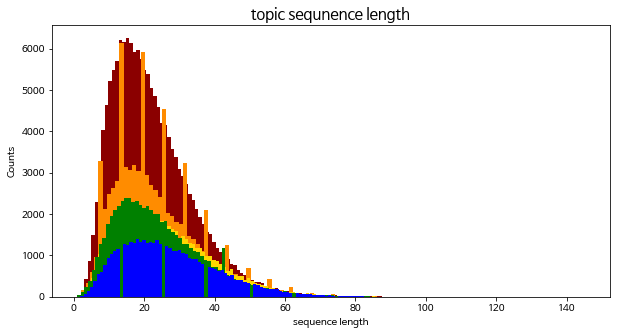

In [249]:
plt.figure(figsize = (10,5))

#가족
plt.hist(df_top_1_len, bins = 120, alpha=1, color="darkred", label="word") 

#연애/결혼
plt.hist(df_top_2_len, bins = 120, alpha=1, color="darkorange", label="word")

#먹거리
plt.hist(df_top_3_len, bins = 120, alpha=1, color="gold", label="word")

#회사/학교
plt.hist(df_top_4_len, bins = 120, alpha=1, color="g", label="word")

#여행지
plt.hist(df_top_5_len, bins = 120, alpha=1, color="b", label="word")



plt.title('topic sequnence length' , fontsize = 15)
plt.xlabel('sequence length')
plt.ylabel('Counts')

- 길이가 10~30인 문장들이 높은 비율을 차지하고 있다.
- 가족 > 연애/결혼 > 먹거리 & 회사/학교 > 여행지 순으로 데이터의 개수가 많음 
- 연애/결혼 데이터를 보면 중간 중간 특정 길이의 데이터 개수가 폭발하는 부분이 나온다 
    - 이 부분은 굳이 제거하지 않아도 되는건가? 

### 가족

In [188]:
df_top_1_ls

['어 알겠는가 외국인들이 그래도 잘 적응하고',
 '뭐 그걸로 애초에 내가 뭐 증명을 하려고 했었는데',
 '그렇죠?',
 '머리 쪽에 엠알아이를 찍어 보래요.',
 '한번 그냥 속는 셈 치고 가보세 그러더라고.',
 '그래서 인제 큰일 났다',
 '응~ 하라는 공부는 안 하고 맨날 술 처먹고 돌아다니다가 응~ 자기는 자기 나름대로 공부를 한다고 하는데 내가 뭐~ 우기는 그게 아닌 거 같거든.',
 '그리고 막둥이는',
 '터지기 직전의 것도 이제 이거 이렇게 뭘 빼 갖고 이제',
 '같이 가서 나는 일층 로비에 기다리고',
 '나는 애낳고 몸 풀러 몸 만드려고 약 지으러 갔는데',
 '가족들이 더 많이 생기고 그러면은',
 '그래서 그냥 이제 그 상태에서는 우리가 선택을 하면 산소호흡기를 꽂아서 놓을 수 있는데',
 '그~ 흔히 막 중이병이라고 하지 그래 가지구 막 자기가 뭐~ 완전 센 거 같고 막 자기가 막 최고인 거 같고 막 그래 가지고',
 '그러니까 요거를 계속 한 거지 요거 요거 요거 CPR 라 근가',
 '하나는 핏줄이 머리를 향한 핏줄이 좁아졌고',
 '거기서 찍어보라니까 인제 난 무섭지',
 '그리고 우리 오빠는 지금 공부를 하는 중인데 이 시키가',
 '별로 부를 기회도 없고 애들이',
 '그날 염색을 하고 아이구 어머니한테 이쁘게 가야되겠다 이런 생각이 들었다고?',
 '솔직히 과락 뜬 과목 열심히 했으면 그 정도는 붙어야 되는 거 아니냐고 근데 또 자기는 또',
 '보면서 하고 있으면 그 다음날 아침에 일어나는 게 너무 편한데',
 '메니에르 혹시 메니에르라고 알아?',
 '근데 나는 한 없이 남겨 갖고 엄마를 이렇게 챙겨주 챙겨 줬대.',
 '여자 친구를 사귈 수 있지 않을까라고 생각핸 하는데',
 '그래서 이제 입원해 가지고 엠알아이 찍고 나왔는데 아무 이상이 없데요.',
 '우리 애들도 결혼하면 이제',
 '주머니에 넣어 주거나 손에 이렇게 갖다주거든',
 '식구들이 이제 아버님 볼 때까지만 어떻게 오실 때까지만 이렇게',
 '원만

In [214]:
temp_list = []
index = []

for i in range(len(df_top_1_ls)):
    temp_list.append(len(df_top_1_ls[i]))
    
top_1_max_list = max(temp_list)
top_1_min_list = min(temp_list)


index.append(temp_list.index(top_1_max_list))
index.append(temp_list.index(top_1_min_list))


print("[최대 길이 문자열]   ",df_top_1_ls[index[0]])
print("[최대 길이]", top_1_max_list)
print("")
print("[최소 길이 문자열]  ",df_top_1_ls[index[1]])
print("[최소 길이]", top_1_min_list)

[최대 길이 문자열]    안하고 난 그냥 싼 데 가가 지고 그냥 왜냐하면 우리엄마가 막 파마라하는거야 난 파마 하기 싫은데 뭐 나이가 들어가지고 뭐 파마를 안하면 추리하다 뭐하다 하면서 하도 파마를 하니까 할 수 없이 가서 일 년에 딱 두
[최대 길이] 119

[최소 길이 문자열]   나
[최소 길이] 1


### 연애/결혼

In [171]:
df_top_2_ls

['요즘에 이제 거의 끝났는데 비밀이 숲 투라고 알지 모르겠네',
 '그러는 거야.',
 '난 그냥 네 남자친구 좀 문제라고 생각해.',
 '하다가 이제 내가 저 전화번호를 이제 그 이모한테 받아가지고',
 '구라안치고 한 지금 육백오십일 아 삼십일 사귀었는데',
 '그래도 비슷하지요 그~ 지금까지 만난 사람들 중에서는 그래도 제일 엄청 예뻐 가지고',
 '그 옛날 지금이야 뭐',
 '얘가 처음이에요 어디를 저기 그 이제 보령으로 이사를 가잖아',
 '물론 나도 이제 그 오빠한테만 기른다는 게 아니라 물론 나도 맞벌이하지 근데',
 '나도 그거 한번 결제해 보려는데 뭐 너',
 '애기 아빠한테 물어보면 알 수는 있으려나',
 '물론 아니 제가 뭘 잘못한지도 모르고 야 존나 의미',
 '그 좀 약간 인상이 좀 그랬어 그러니까 이제 그 인상이 별로 인 가 봐 그런데 인제',
 '애들만큼은 자기 원하는 자기 저기 한 사람하고 막',
 '그 열 시간씩 자는 잠을 좀 줄이라 했거든 근데 맨날 자기는 그런 스타일이야.',
 '내가 그런 성격을 되게 원래는 되게 좋아하면서도 조금 어려워하는 스타일이기는 한데',
 '뭐 다음주에나 보겠지 보려는지 안 보려는지도 모르겠어.',
 '대부분 집에 이렇게',
 '연애 자기들이 연애를 어렸을 때 연애한 봄 암 것도 몰르고',
 '친구들 너무 좋아하는 거야 만날 때마다 친구들을 끼고 만나고 그러니까',
 '근데 더 이상은 암만 너희들이 뭐라 해도 절대 나는 안 한다.',
 '근데 또 나중에 또 만나게 되면 또 마음이 바뀌었으면 다시 만날 자신은 있어?',
 '이게 순탄하고 어찌 보면은 사람들한테 본이 되고 귀감이 되는',
 '그러니까 그럴 그럴 수도 있어 그리고 국회가 강제잖아.',
 '마음도 그치 중요하고',
 '그 그 언니하고는 연락이 잘 안돼.',
 '이제 친정에 갔어 나도 가고 장난이 더 그런 모으고 형부도 오셨어.',
 '그러니까 만약에 못 그러니까 언니 스타일 아냐 못 생겼다고 하지말고 언니 스타일 아니야',
 '뭐 아직도 

In [212]:
temp_list = []
index = []

for i in range(len(df_top_2_ls)):
    temp_list.append(len(df_top_2_ls[i]))
    
top_2_max_list = max(temp_list)
top_2_min_list = min(temp_list)


index.append(temp_list.index(top_2_max_list))
index.append(temp_list.index(top_2_min_list))


print("[최대 길이 문자열]   ",df_top_2_ls[index[0]])
print("[최대 길이]", top_2_max_list)
print("")
print("[최소 길이 문자열]  ",df_top_2_ls[index[1]])
print("[최소 길이]", top_2_min_list)

[최대 길이 문자열]    해가지고 버스 시간도 조금 널널하게 한 십 분 정도 남았으니까 기다리면 되겠지 했는데 버스 시간 오 분이 되기 전에도 안 오는 거야 그래 전화를 했더니만 그~ 같이 사라졌다던 사람 있지 않니 걔랑 걔가 받아가지고 어~ 야 지금 바쁘니까 나중에 연락할게 이러길래
[최대 길이] 145

[최소 길이 문자열]   해
[최소 길이] 1


### 먹거리

In [192]:
df_top_3_ls

['약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도',
 '그거를 이렇게 깨달으면서 제가 좋아하는 맛집이 여기 주변에도 몇 개가 있어요.',
 '누나 혼자만 한다고 하면은 조금 많이 못 미덥긴 한데',
 '칼로리 ㄹ적으로 조금 이제 문제가 생길 수 있다. 조금 아무래도 그런 걸 신경쓰면 과도하게 신경 쓰는 것도 스트레스일 수 있지만',
 '그렇지.',
 '그것 때문에 살이 더 찔 것 같다는 생각이 들 정도로 요즘 너무 많이 먹어버렸어.',
 '긴급히 버리고?',
 '막 그려 아~ 모르겠다 나는',
 '모르는데 이게 나만 아는 그런 또 맛이 있고 약간 조금 식성이 있잖아 사람들이',
 '굴이 그때 제철이어서 그랬던지 그리고 그 형부가 그 저기',
 '가시',
 '내가 버거는 또 이제 또 나는 버거킹 버거킹을 가장 좋아하는데 최근에 내가 또 말이야',
 '금방 돈 모으겠다.',
 '그거 차곡차곡 쌓아서 올리고 썰어가지구 냄비에 넣은 다음에 육수는 무랑',
 '근데 이번엔 조금 먹으러 가봤는데 너무 생각보다 맛있는 거예요 맵게 나오니까는',
 '누구냐 우리는 우리 엄마가 배추 심었는데 배추가 그렇게 좋지 않은 것 같아 좀 절임 배추를 좀 사야되나 어쩌나',
 '또 요리하면 난데.',
 '저는 몇 번 파스타',
 '그렇게 먹었던 그 그런 기억들이 인제 먹거리를 하면 인제 그 추억이 남는 거야 그러니까',
 '그런데 그~ 수송점이 쪼끔 더 막 못하잖아 그냥 완전 못하잖아',
 '썰어서 양념장 넣을 때 양념장이 맛있으면',
 '저기 야채장사를 했었어 남광주시장에서.',
 '세미 한정식인데 이렇게',
 '다시마랑 멸치 육수 뽑아가지고 그냥 넣어서',
 '아~ 조금 뭐~ 조금 질이 고기가 많이 늘었고 이러면 먹을 수는 있는데',
 '그래도 그~ 아침에 먹을 때는 또 이 간단하게 시켜 먹을 수 있는 어 그런 거 있잖아 그~',
 '조금 그렇긴 한데',
 '와~ 뭐라 해야 될까 산에서 힘들었던 것들이 조금 쫙 내려가는 느낌 들고',
 '그러니까 그런 요리채널이 상당히 많아 

In [216]:
temp_list = []
index = []

for i in range(len(df_top_3_ls)):
    temp_list.append(len(df_top_3_ls[i]))
    
top_3_max_list = max(temp_list)
top_3_min_list = min(temp_list)


index.append(temp_list.index(top_3_max_list))
index.append(temp_list.index(top_3_min_list))


print("[최대 길이 문자열]   ",df_top_3_ls[index[0]])
print("[최대 길이]", top_3_max_list)
print("")
print("[최소 길이 문자열]  ",df_top_3_ls[index[1]])
print("[최소 길이]", top_3_min_list)

[최대 길이 문자열]    우리 가족들을 위해서 음식하는 그 모습이 있었기 때문에 나도 크면 엄마처럼 저렇게 저 뭐냐 가 뭐냐 가족들을 위해서 음식을 저렇게 하면서 또 내조하면서 저렇게 사는 삶도 괜찮지 않을까 이렇게 한 번씩 꿈꿔왔었거든요.
[최대 길이] 120

[최소 길이 문자열]   가시
[최소 길이] 2


### 연애/결혼

In [194]:
df_top_4_ls

['그러니까 쪼끔 힘들긴 하지 내가.',
 '희한한 맛이었어 뭘 긍까 뭐라할까 김 그 김 김밥나라나 이런 데에서 싸는 그런 맛이랑 조금 다른 맛이었어.',
 '아니야 딱 적당 했어 그래갖고 이제',
 '이~ 여름에는 상관없는데 인제 겨울에는 인제 환기시킬 때마다 조금 많이 추워가지고',
 '어제도 그냉 집에 가서 감기 기운 땜에 그냥 쉬었거든요.',
 '공부하고 있으려니까 미칠 거 같고 벌써 상상만 해도 그리고',
 '닦았는데 그 물티슈가 없는 것이야 그래 가지구',
 '내가 이제 시골서 자라서 초등학교도 시골 중학교도 시골 고등학교 이제',
 '그냥 엄마 아빠 그렇게 할스 지도 않고',
 '칠 층 가서 앉아 있으면 되는 것이야.',
 '그게 뭔가 조금',
 '남녀의 성비가 적절하게 떨어지면 재미없어 동생아 어',
 '그렇지 엄마랑 할머니랑 다 같이 가갖고 어디 있나 이렇게 언니 꺼 그 언니 춤추고 있으믄 동선 같은 거 구경하면서',
 '음~ 그러니까 누구는 뭐~',
 '어쨌든 어떻게 보면은 내가 지금은 다 안정적이다고는 말할 수는 없지만',
 '그 징그럽게 긴 본관 걸어가는데 십 분 걸리는 본관 그게 좀',
 '그때 공부를 조금 해서 내신을 조금',
 '내 친구는 내 친구 가시나 친구 둘이는 자기 엄마한테 가자마자',
 '우리 사진을 조금 알아주고',
 '그러니까 신랑 이렇게 스트레스 조금 덜 받는 거야.',
 '그 스트레스 땜에 그냥 이렇게 그 그 기분이 계속 간 거야.',
 '새벽에 이제 새벽에 출발해야 되잖아 월출산 같은 경우는',
 '그렇지 신입생 들어오면 넘 봐 줘야지 그 재미로 학교 다니는데 우리 복학생 오빠들은.',
 '아니 근데 나도 아직도 기억나는 게',
 '우리 동내 남자가 좋아하는 여자가 다른 동네에서 사는데',
 '오 학년 때 우리 야행 이라는 그런게 있었어 그래갖고 이제 학교에서',
 '부모님 친구들도 좋아하고 엄마 아빠도 좋아하고 하니까',
 '전기과 간 다음에 인제 그래도 공부하고 자격증도 따고 했지 그래갖고',
 '너희 집 가서 

In [217]:
temp_list = []
index = []

for i in range(len(df_top_4_ls)):
    temp_list.append(len(df_top_4_ls[i]))
    
top_4_max_list = max(temp_list)
top_4_min_list = min(temp_list)


index.append(temp_list.index(top_4_max_list))
index.append(temp_list.index(top_4_min_list))


print("[최대 길이 문자열]   ",df_top_4_ls[index[0]])
print("[최대 길이]", top_4_max_list)
print("")
print("[최소 길이 문자열]  ",df_top_4_ls[index[1]])
print("[최소 길이]", top_4_min_list)

[최대 길이 문자열]    근데 나 진짜 웃긴 게 나 일 학년 때 제일 안했는데 일 학년 때가 제일 잘 나오긴 했어. 그냥 그만큼 애들이 또 안 하긴 하는데 그만큼 일 학년 하면 나와. 그리고 전공이 아니라 교양들이 많아 가지고 교양은 따기 쉽거든.
[최대 길이] 124

[최소 길이 문자열]   좀
[최소 길이] 1


### 회사/학교

In [203]:
df_top_5_ls

['이게 이런 거 많이 그 지금 신청하는 사람들이 엄청 많더라고',
 '마음속에 한다고 여행 가서도 신경쓰게 한다고 안 좋아하더라고',
 '집에 있으면 아파 밖으로 나가면 안 아파 뭔 병인가 봐.',
 '근데 이게 이것저것 걸려서 어떻게 되려나 모르겠다.',
 '그래 난 나중에 한번 가면 먹어 봐야겠네.',
 '왜냐하면 그전에 여행 떠나기 전에 내 지인이',
 '피곤해도 막 눈을 질끈 이렇게 뜨고',
 '그러니까는 어디 못 나가고 있으니까 죽겠는가 봐 집에만 있으니까',
 '에~ 이렇게',
 '되게 넓게 이렇게 경치를 다 볼 수가 있거든요 런던의 전경을.',
 '낮에 갔었으면 이렇게 높이 있을 때는',
 '그치 여행은 그러려고 가는 거지.',
 '흠 나는 아직까지는 그리고 애들 데리고 다니니까',
 '그러니까 엄마들도 아니 엄마 친구들도 그 모임 하잖아.',
 '조금 그런 것도 좀 눈치 보이기는 하는데',
 '-네가- 다른 뭐~ 가족 여행 갈 거 -있- 이틀도 뭐~ 괜찮으면은 고창으로',
 '그래서 인제 비행기는 당분간 못 탈거 같고',
 '거기에 인제 뭐 갯벌 같은 데 가가지고',
 '그러니까는 난 진짜 동물 되게 싫어하거든요?',
 '그러면 혹시 외국에서 숙소는 이렇게 뭐 호텔도 있고 무슨',
 '놀랄 정도야 근데 사진으로 담으면 그게 안 나오더라.',
 '이렇게 참게 같은 쪼그마한 게들도 많고',
 '느낌이 너무 달라 어~ 그래서 인제 어~ 우리 애들이',
 '언니 요즘에 코로나 떄문에',
 '맞아 맞아.',
 '내 건강관리는 내가 알아서 할테니까',
 '몇 센치라 했지 그것두 꼭 먹어보고 싶은데.',
 '그리고 마누라도 조금 소아마비 조금 잇듯이 하고 조금 걷는 것도 불편한 사람인데',
 '그럴 수 있을려나 몰라 나도 연습벌렌데 너도 참 연습벌레야.',
 '그래 봤구나 그런데 희한한 건 뭐냐면 또 다른 인자 그 여 이제 가야 되잖아',
 '여수도 또 가면 좋은데 이제 여수는 너무 많이 가 갖고 조금 질리기도 하고',
 '거기다가 이제 조금 돈을 놔두기는

In [218]:
temp_list = []
index = []

for i in range(len(df_top_5_ls)):
    temp_list.append(len(df_top_5_ls[i]))
    
top_5_max_list = max(temp_list)
top_5_min_list = min(temp_list)


index.append(temp_list.index(top_5_max_list))
index.append(temp_list.index(top_5_min_list))


print("[최대 길이 문자열]   ",df_top_5_ls[index[0]])
print("[최대 길이]", top_5_max_list)
print("")
print("[최소 길이 문자열]  ",df_top_5_ls[index[1]])
print("[최소 길이]", top_5_min_list)

[최대 길이 문자열]    애들 데리고 다닐라 하니까 짐이 너무 많으니까 막 짐 챙기고 다닐려고 하니까 너무 힘들더라고요 그 이제는 조금 어느 정도 커가지고 애들 데리고 이렇게 여행을 다니니까 엄마 아빠는 되게 좋은 거 같애요.
[최대 길이] 112

[최소 길이 문자열]   어
[최소 길이] 1


## [ref]
- https://inistory.tistory.com/93
- https://soyoung-new-challenge.tistory.com/35
- color 참고 
    - https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    
- 문장 최소 최대 길이 
    - https://pythonblog.tistory.com/7
    
- list안에서 중복값 개수 구하기
    - https://jsikim1.tistory.com/218